In [3]:
#!pip install DiadFit --upgrade 

In [ ]:
#"https://github.com/PennyWieser/DiadFit/archive/refs/tags/0.0.26.zip"

In [1]:
import statistics as sta
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.parser import parse
import matplotlib.dates as pdates
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.32'

In [8]:
 # Path to metadata files for Ne. Easier to have in subfolder
meta_path=r"G:\My Drive\Berkeley_NEW\DiadFit_outer\Testing\Charlotte_Broke\METADATA"
spectra_path=r"G:\My Drive\Berkeley_NEW\DiadFit_outer\Testing\Charlotte_Broke\SPECTRA"
# Find files

# Put the common string you can in all your Ne lines here
ID_str='Si'
file_ext_meta='.txt' # Will only take files of this type 
exclude_str='IMG' # Will exclude files of this type, sometimes images have same name
 # Leave as none unless witec appended a number
Si_files_meta=pf.get_files(path=meta_path, file_ext=file_ext_meta, ID_str=ID_str, 
                         exclude_str=exclude_str, sort=True)

Si_files_meta

['03 Si_Chip_Satam3.txt',
 'Si_50X300g_postpin.txt',
 'Si_Chip_1998_300g_Nov2222.txt',
 'Si_Chip_1998cent300g_NOV1122.txt',
 'Si_Chip_1998cent300g_NOV1522.txt',
 'Si_Chip_1998cent300g_NOV1622.txt',
 'Si_Chip_1999_300g_Nov2222.txt',
 'Si_Chip_1999cent300g_NOV1122.txt',
 'Si_Chip_1999cent300g_NOV1522.txt',
 'Si_Chip_1999cent300g_NOV1622.txt',
 'Si_Chip_2000_300g_Nov2222.txt',
 'Si_Chip_2000cent300g_NOV1122.txt',
 'Si_Chip_2000cent300g_NOV122.txt',
 'Si_Chip_2000cent300g_NOV1522.txt',
 'Si_Chip_2000cent300g_NOV1622.txt',
 'Si_Chip_2000cent300g_NOV222.txt',
 'Si_Chip_2000cent300g_NOV322.txt',
 'Si_Chip_2000cent300g_NOV422.txt',
 'Si_Chip_2000cent300g_NOV722.txt',
 'Si_Chip_2000cent300g_NOV822_R1.txt',
 'Si_Chip_2000cent300g_NOV822_R2.txt',
 'Si_Chip_2000cent300g_OCT2922x1.txt',
 'Si_Chip_2000cent300g_OCT2922x2.txt',
 'Si_Chip_2000cent300g_OCT2922x3.txt',
 'Si_Chip_2000cent300g_OCT3122.txt',
 'Si_Chip_2001_300g_Nov2222.txt',
 'Si_Chip_2001cent300g_NOV1122.txt',
 'Si_Chip_2001cent300g_NOV122

In [4]:
# Extract useful metadata from each file
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, Allfiles=Si_files_meta, 
                                prefix=False, trupower=False)

# this strips the newline from the date column
y=[]
for x in meta['date']:
    y.append(x.strip())

if 'date' in meta:
    meta=meta.drop('date',axis=1)

meta.insert(1,'date',y)

meta=meta.sort_index()
meta

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 83/83 [00:02<00:00, 36.50it/s]

Done
Oof, try not to work after midnight!


filename               date     Month   Day  \
0               03 Si_Chip_Satam3.txt   October 29, 2022   October  29.0   
1              Si_50X300g_postpin.txt   October 28, 2022   October  28.0   
2       Si_Chip_1998_300g_Nov2222.txt  November 22, 2022  November  22.0   
3    Si_Chip_1998cent300g_NOV1122.txt  November 11, 2022  November  11.0   
4    Si_Chip_1998cent300g_NOV1522.txt  November 15, 2022  November  15.0   
..                                ...                ...       ...   ...   
78    Si_Chip_521cent1800g_NOV322.txt   November 3, 2022  November   3.0   
79  Si_Chip_521cent1800g_NOV322x2.txt   November 3, 2022  November   3.0   
80    Si_Chip_521cent1800g_NOV722.txt   November 7, 2022  November   7.0   
81    Si_Chip_521cent1800g_NOV822.txt   November 8, 2022  November   8.0   
82      Si_Chip_522_1800g_Nov2222.txt  November 22, 2022  November  22.0   

    power (mW)  Int_time (s)  accumulations  Mag (X)            duration  \
0          NaN           0.5           10.0     50.0  ['0h', '0m', '8s']   
1          NaN           0.5           10.0     50.0  ['0h', '0m', '8s']   
2          NaN           0.5           10.0     50.0  ['0h', '0m', '9s']   
3          NaN           0.5           10.0     50.0  ['0h', '0m', '7s']   
4          NaN           0.5           10.0     50.0  ['0h', '0m', '8s']   
..         ...           ...            ...      ...                 ...   
78         NaN           0.5           10.0     50.0  ['0h', '0m', '7s']   
79         NaN           0.5           10.0     50.0  ['0h', '0m', '7s']   
80         NaN           0.5           10.0     50.0  ['0h', '0m', '7s']   
81         NaN           0.5           10.0     50.0  ['0h', '0m', '7s']   
82         NaN           0.5           10.0     50.0  ['0h', '0m', '7s']   

        24hr_time  sec since midnight  Spectral Center  
0    9:42:22 AM\n             34942.0         2000.290  
1   11:25:46 AM\n             41146.0         2000.290  
2   10:04:08 AM\n             36248.0         1997.737  
3   11:07:47 AM\n             40067.0         1997.737  
4   11:37:22 AM\n             41842.0         1997.737  
..            ...                 ...              ...  
78  10:48:25 AM\n             38905.0          520.947  
79  10:51:30 AM\n             39090.0          520.947  
80  10:42:44 AM\n             38564.0          520.947  
81  11:29:11 AM\n             41351.0          520.947  
82  10:02:44 AM\n             36164.0          522.044  

[83 rows x 12 columns]

In [5]:
#Extract dates as days since pinhole adjustment
dateobject=[]
for ix in meta['date']:    
    dateobject.append(parse(ix))

meta['day#']=pdates.date2num(dateobject)-pdates.date2num(min(dateobject))
meta

filename               date     Month   Day  \
0               03 Si_Chip_Satam3.txt   October 29, 2022   October  29.0   
1              Si_50X300g_postpin.txt   October 28, 2022   October  28.0   
2       Si_Chip_1998_300g_Nov2222.txt  November 22, 2022  November  22.0   
3    Si_Chip_1998cent300g_NOV1122.txt  November 11, 2022  November  11.0   
4    Si_Chip_1998cent300g_NOV1522.txt  November 15, 2022  November  15.0   
..                                ...                ...       ...   ...   
78    Si_Chip_521cent1800g_NOV322.txt   November 3, 2022  November   3.0   
79  Si_Chip_521cent1800g_NOV322x2.txt   November 3, 2022  November   3.0   
80    Si_Chip_521cent1800g_NOV722.txt   November 7, 2022  November   7.0   
81    Si_Chip_521cent1800g_NOV822.txt   November 8, 2022  November   8.0   
82      Si_Chip_522_1800g_Nov2222.txt  November 22, 2022  November  22.0   

    power (mW)  Int_time (s)  accumulations  Mag (X)            duration  \
0          NaN           0.5           10.0     50.0  ['0h', '0m', '8s']   
1          NaN           0.5           10.0     50.0  ['0h', '0m', '8s']   
2          NaN           0.5           10.0     50.0  ['0h', '0m', '9s']   
3          NaN           0.5           10.0     50.0  ['0h', '0m', '7s']   
4          NaN           0.5           10.0     50.0  ['0h', '0m', '8s']   
..         ...           ...            ...      ...                 ...   
78         NaN           0.5           10.0     50.0  ['0h', '0m', '7s']   
79         NaN           0.5           10.0     50.0  ['0h', '0m', '7s']   
80         NaN           0.5           10.0     50.0  ['0h', '0m', '7s']   
81         NaN           0.5           10.0     50.0  ['0h', '0m', '7s']   
82         NaN           0.5           10.0     50.0  ['0h', '0m', '7s']   

        24hr_time  sec since midnight  Spectral Center  day#  
0    9:42:22 AM\n             34942.0         2000.290   1.0  
1   11:25:46 AM\n             41146.0         2000.290   0.0  
2   10:04:08 AM\n             36248.0         1997.737  25.0  
3   11:07:47 AM\n             40067.0         1997.737  14.0  
4   11:37:22 AM\n             41842.0         1997.737  18.0  
..            ...                 ...              ...   ...  
78  10:48:25 AM\n             38905.0          520.947   6.0  
79  10:51:30 AM\n             39090.0          520.947   6.0  
80  10:42:44 AM\n             38564.0          520.947  10.0  
81  11:29:11 AM\n             41351.0          520.947  11.0  
82  10:02:44 AM\n             36164.0          522.044  25.0  

[83 rows x 13 columns]

In [6]:
# remove these to get the pure file name you can compare 
file_m=pf.extracting_filenames_generic(names=meta['filename'],
    prefix=False,
    suffix=False,
   file_type='.txt')

file_m

array(['03 Si_Chip_Satam3', 'Si_50X300g_postpin',
       'Si_Chip_1998_300g_Nov2222', 'Si_Chip_1998cent300g_NOV1122',
       'Si_Chip_1998cent300g_NOV1522', 'Si_Chip_1998cent300g_NOV1622',
       'Si_Chip_1999_300g_Nov2222', 'Si_Chip_1999cent300g_NOV1122',
       'Si_Chip_1999cent300g_NOV1522', 'Si_Chip_1999cent300g_NOV1622',
       'Si_Chip_2000_300g_Nov2222', 'Si_Chip_2000cent300g_NOV1122',
       'Si_Chip_2000cent300g_NOV122', 'Si_Chip_2000cent300g_NOV1522',
       'Si_Chip_2000cent300g_NOV1622', 'Si_Chip_2000cent300g_NOV222',
       'Si_Chip_2000cent300g_NOV322', 'Si_Chip_2000cent300g_NOV422',
       'Si_Chip_2000cent300g_NOV722', 'Si_Chip_2000cent300g_NOV822_R1',
       'Si_Chip_2000cent300g_NOV822_R2', 'Si_Chip_2000cent300g_OCT2922x1',
       'Si_Chip_2000cent300g_OCT2922x2', 'Si_Chip_2000cent300g_OCT2922x3',
       'Si_Chip_2000cent300g_OCT3122', 'Si_Chip_2001_300g_Nov2222',
       'Si_Chip_2001cent300g_NOV1122', 'Si_Chip_2001cent300g_NOV122',
       'Si_Chip_2001cent300g_NOV152

In [15]:
path=r"C:\Users\charl\Documents\Si\METADATA"
# This specifies what file type your Raman exported in. 
filetype='headless_txt'
# Specifying the extension here helps to filter out other file types,
# e.g. png files that may be in the folder
file_ext='.txt'
# If your instrument appends a nubmer like 01, 02 to each file, prefix=True removes it
prefix=False

In [11]:
Si_files=pf.get_files(path=spectra_path,
                file_ext='.txt', exclude_str='Ne',
                            exclude_str_2='IMG')
Si_files[0:4]

['Si_50X300g_postpin.txt',
 'Si_Chip_1998_300g_Nov2222.txt',
 'Si_Chip_1998cent300g_NOV1122.txt',
 'Si_Chip_1998cent300g_NOV1522.txt']

In [12]:
filename=Si_files[0]#'Si_50X300g_postpin.txt'#Diad_files[0]#'LL7-109-FI.txt' # This finds the first file

# Alternatively, you can specify the actual file name if you want to fit a specific one
#filename='007_k9.csv'
print(filename)

Si_50X300g_postpin.txt


In [34]:
generic_params=pf.generic_peak_config(cent_generic=525,
lower_bck=(450, 460), upper_bck=(550, 630), amplitude=5000,
    )
generic_params

generic_peak_config(name='generic', lower_bck=(450, 460), upper_bck=(550, 630), N_poly_carb_bck=1, amplitude=5000, cent_generic=525, outlier_sigma=12, N_peaks=3, distance=10, prominence=5, width=6, threshold=0.1, exclude_range=None, dpi=100, plot_figure=True, return_other_params=False)

Peak_Cent_generic  Peak_Area_generic  Peak_Height_generic
0         520.662433       85163.776359          8479.646534

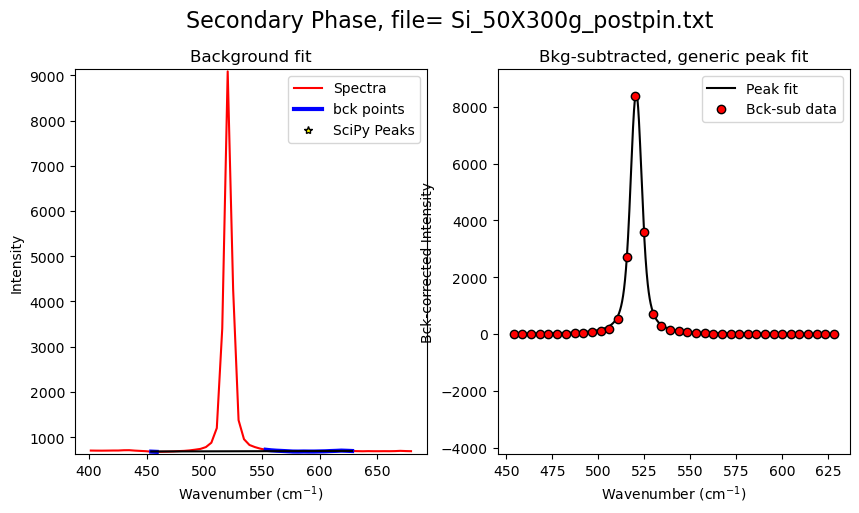

In [35]:
pf.fit_generic_peak(config=generic_params,
path=spectra_path, filename=filename, filetype='headless_txt',
                    model_name='VoigtModel',
 plot_figure=True)

 24%|██████████████████████▋                                                                      | 20/82 [00:04<00:11,  5.40it/s]g:\my drive\berkeley_new\diadfit_outer\src\DiadFit\diads.py:2790: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
100%|█████████████████████████████████████████████████████████████████████████████████████████████| 82/82 [00:22<00:00,  3.71it/s]


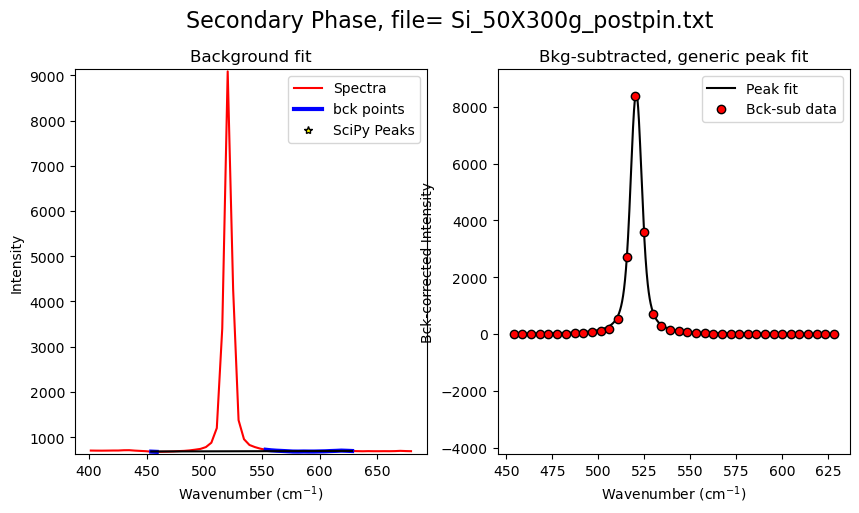

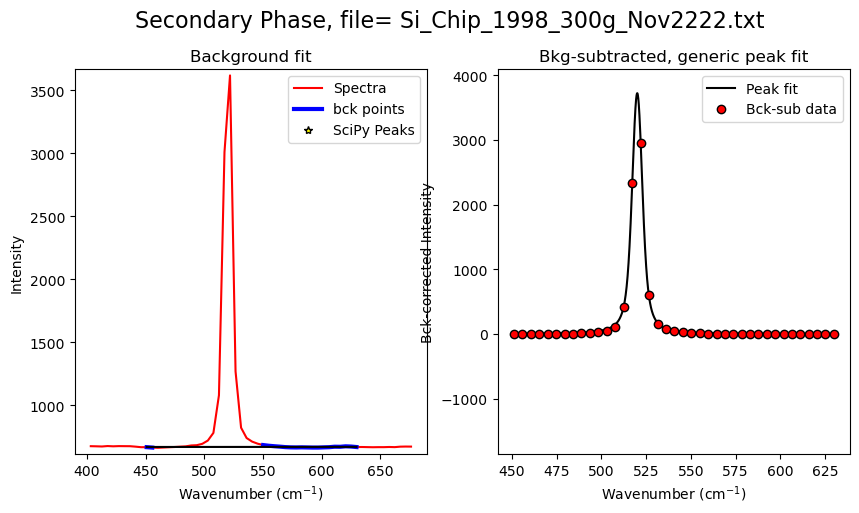

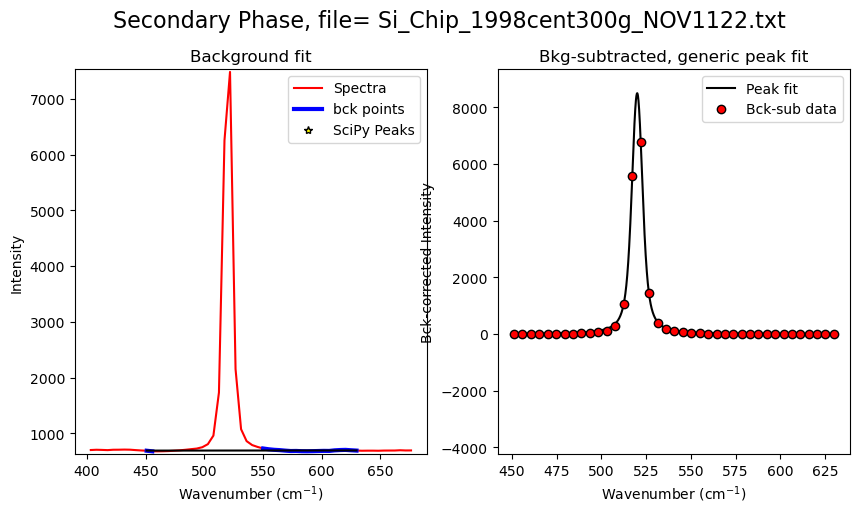

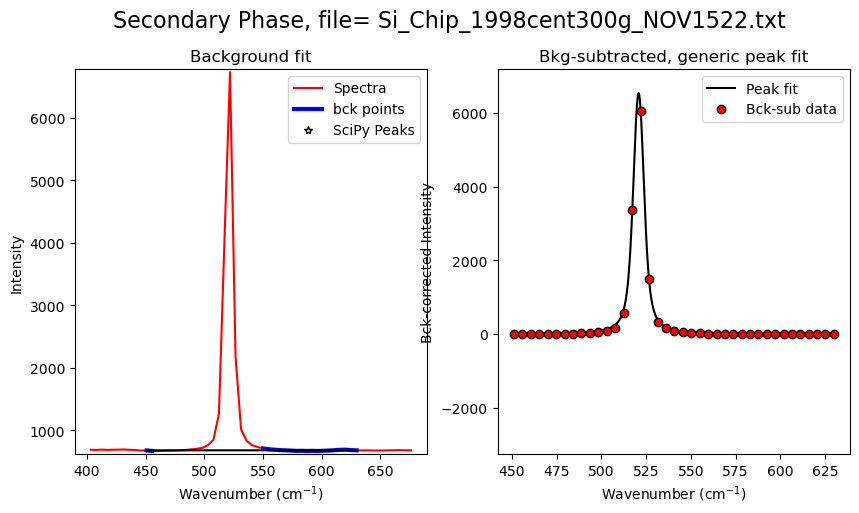

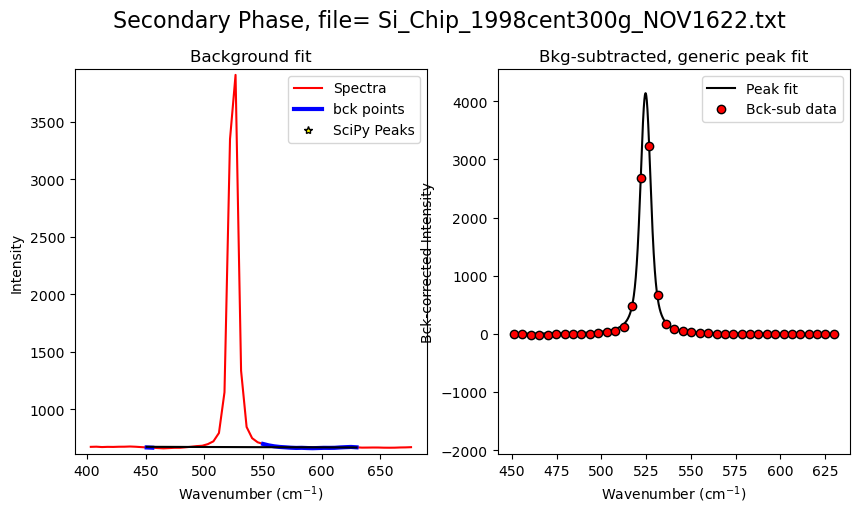

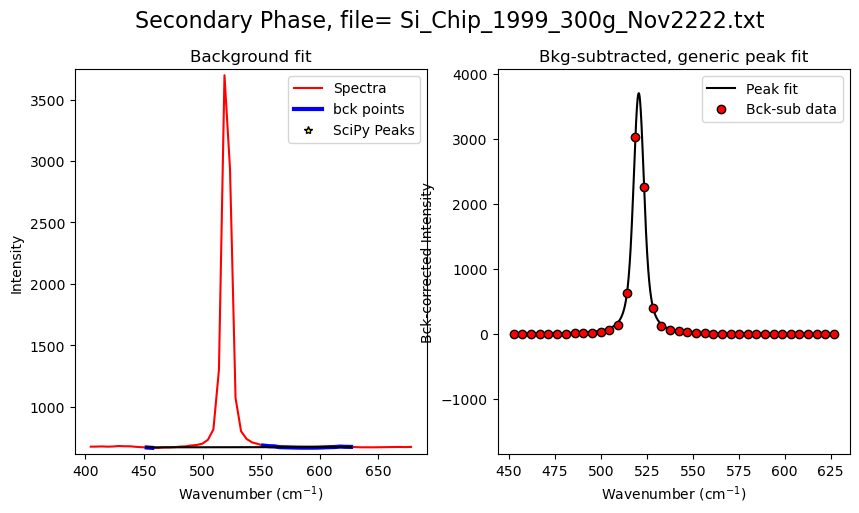

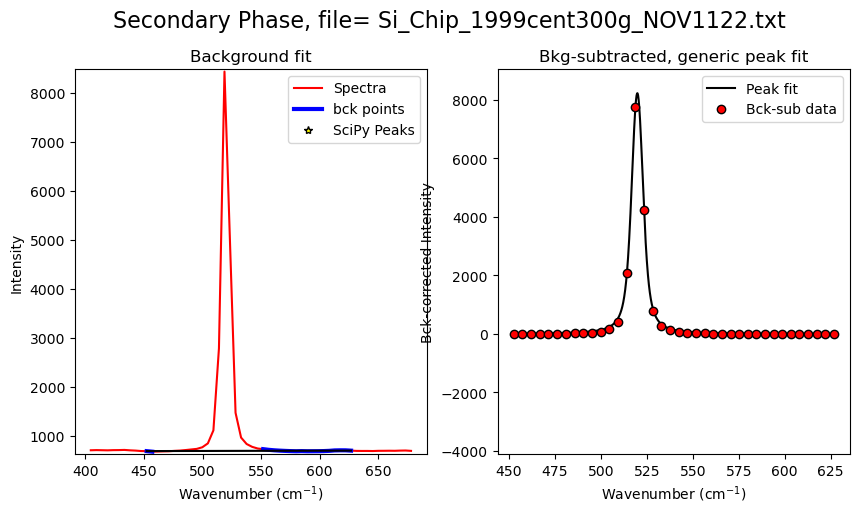

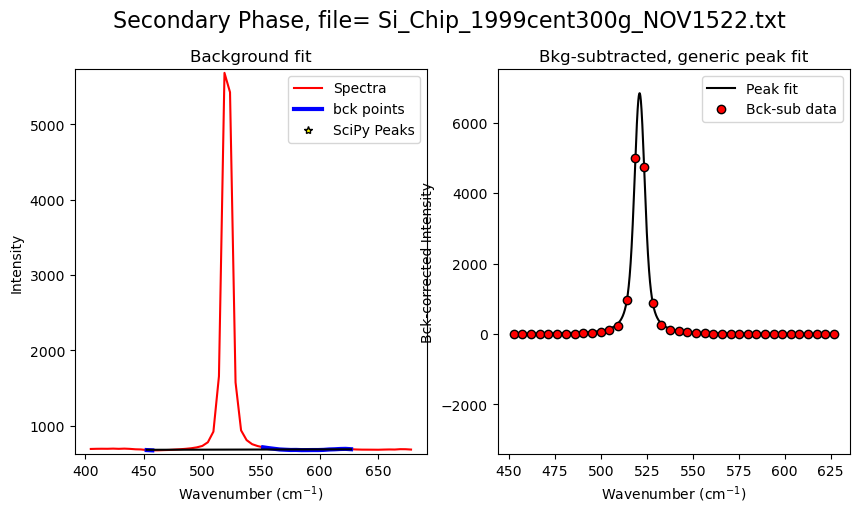

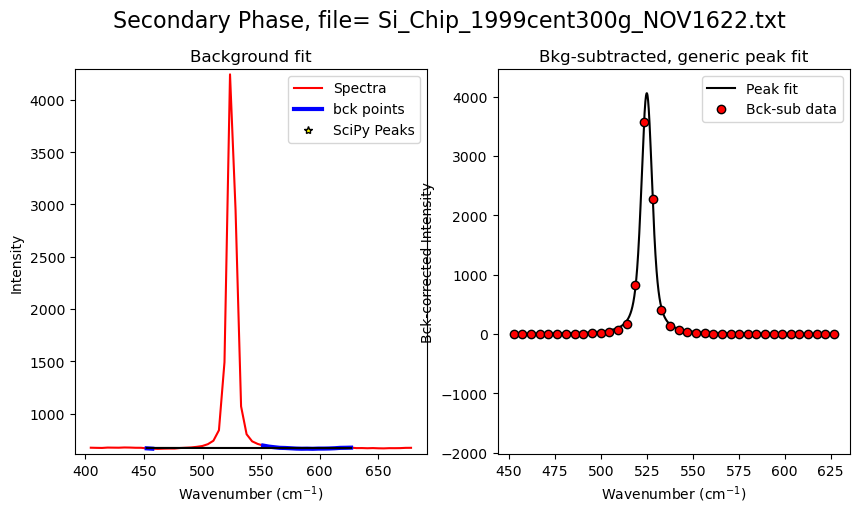

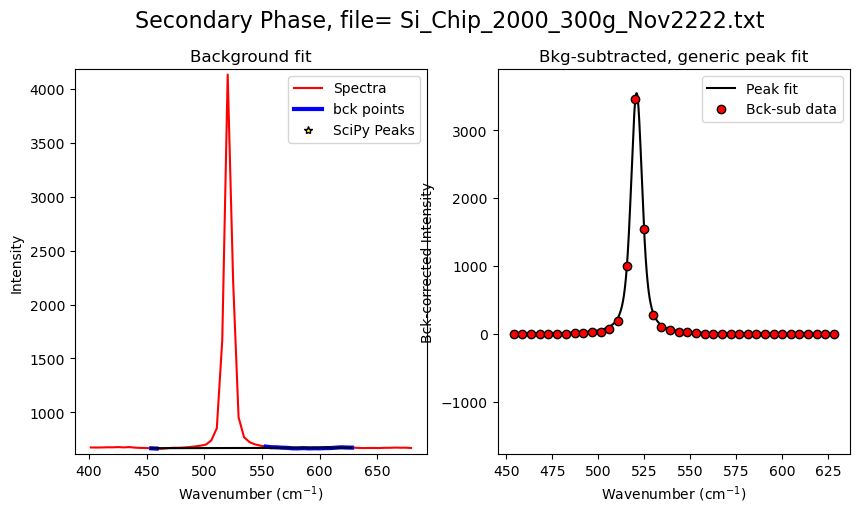

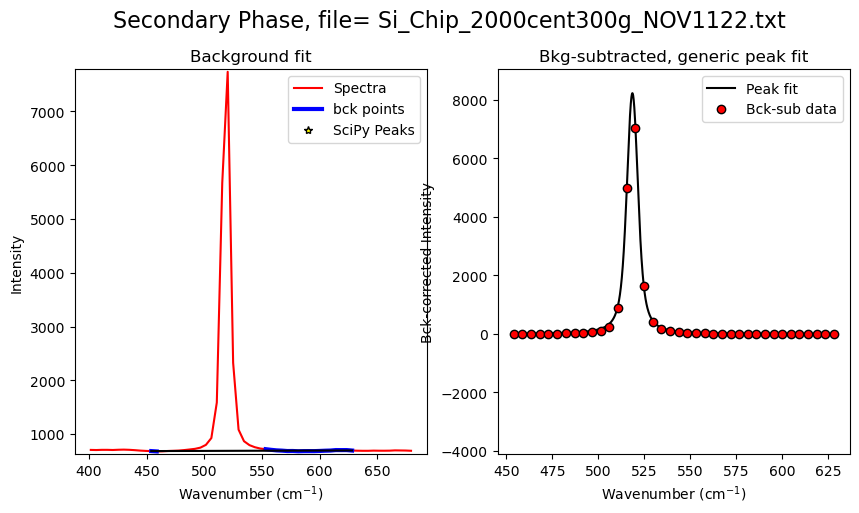

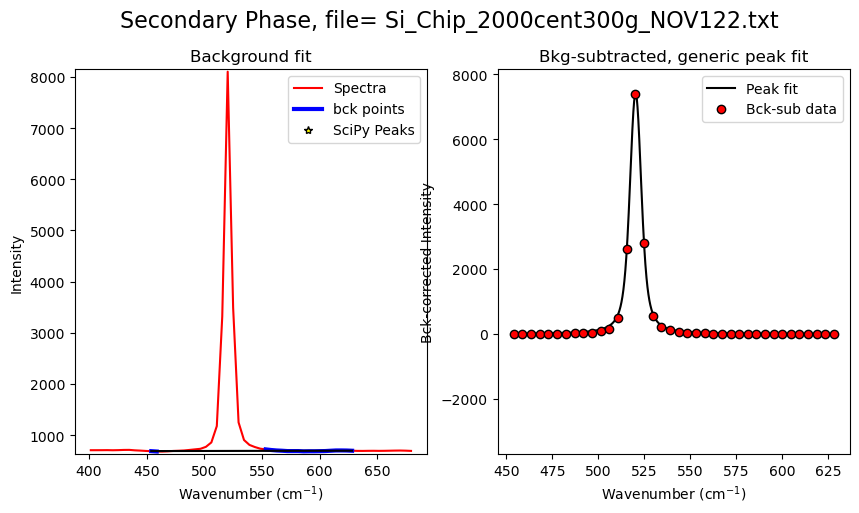

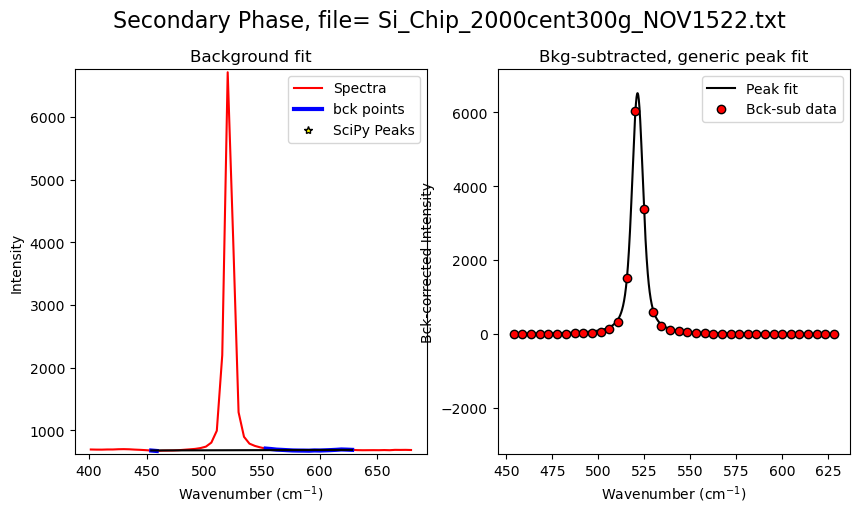

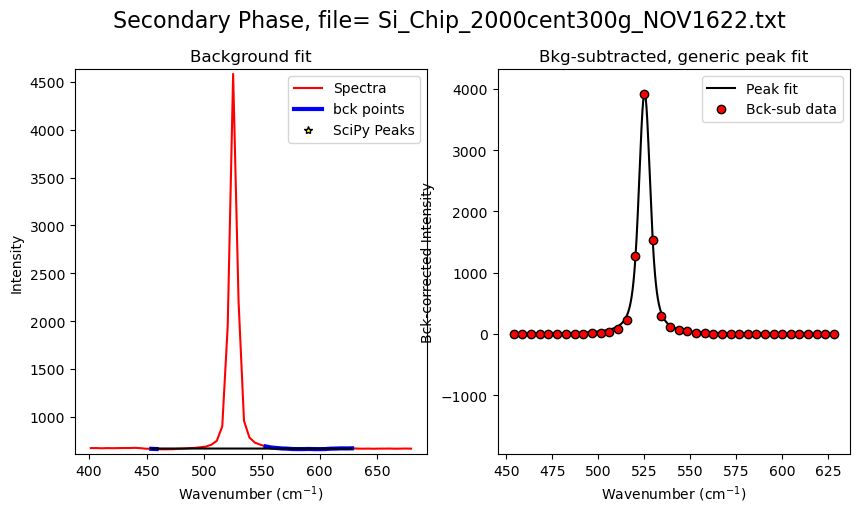

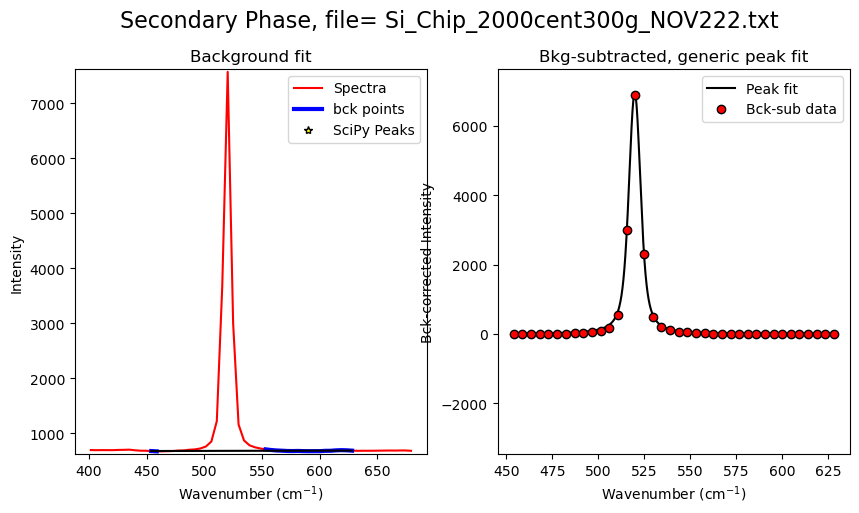

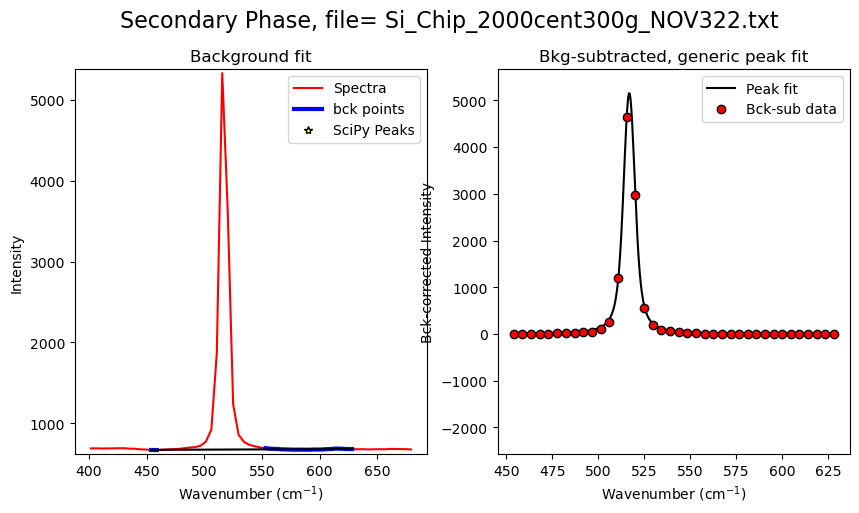

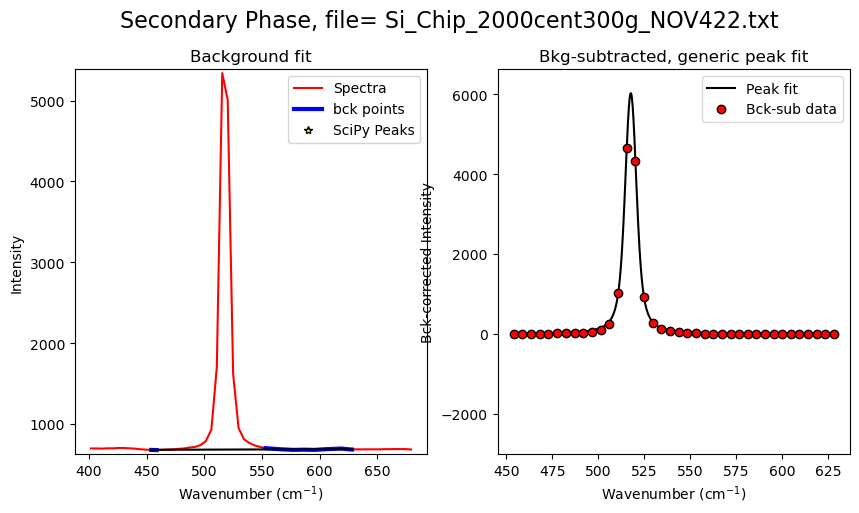

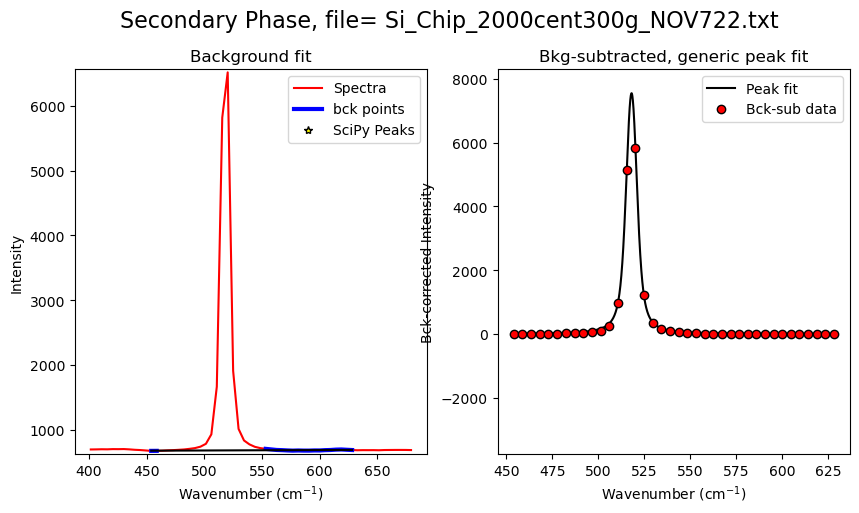

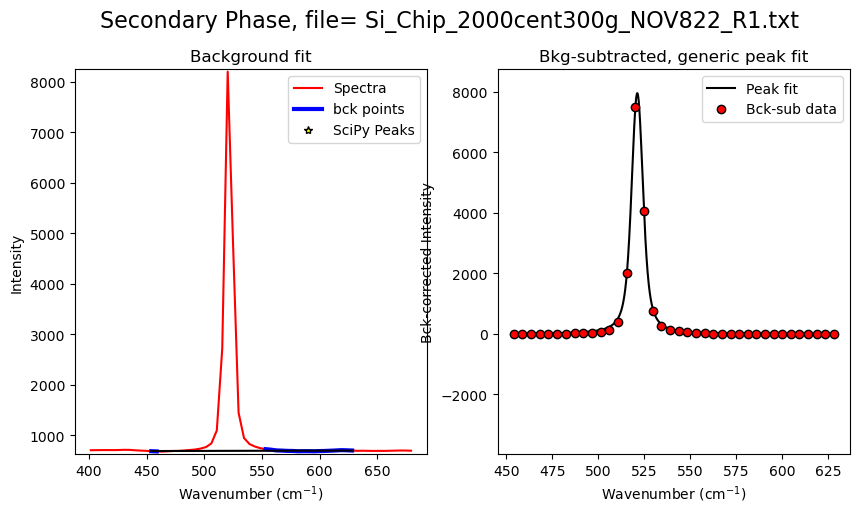

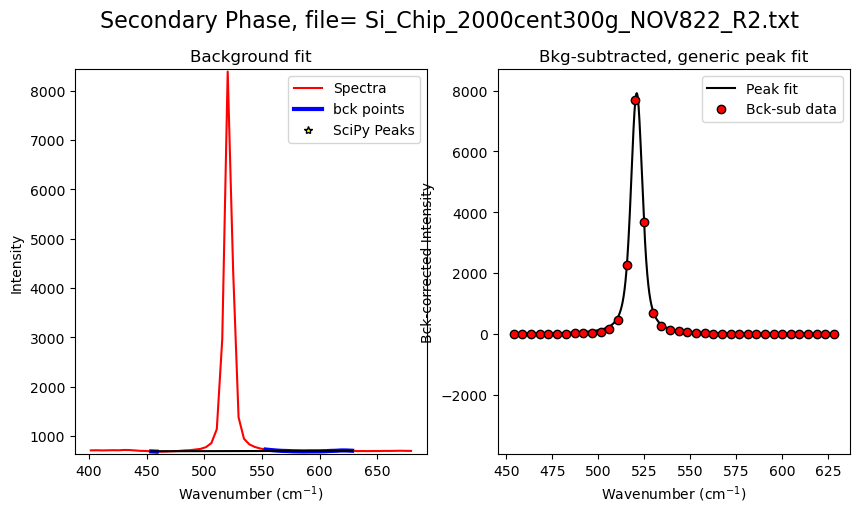

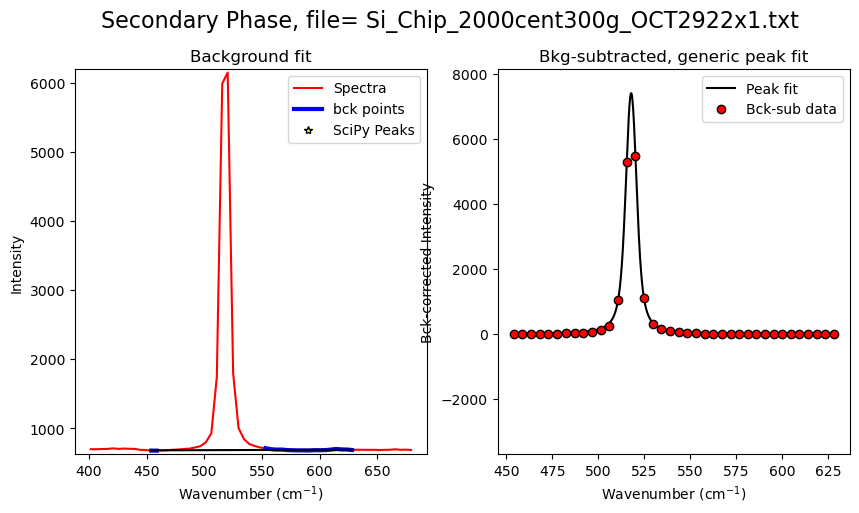

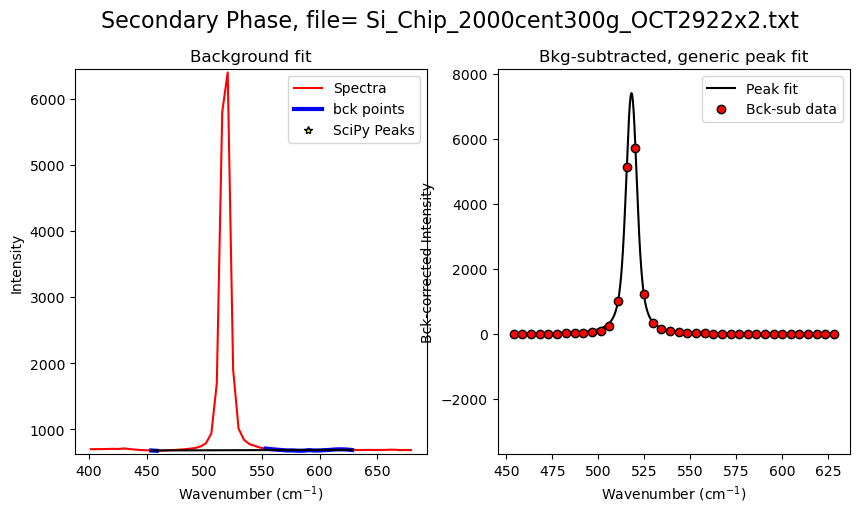

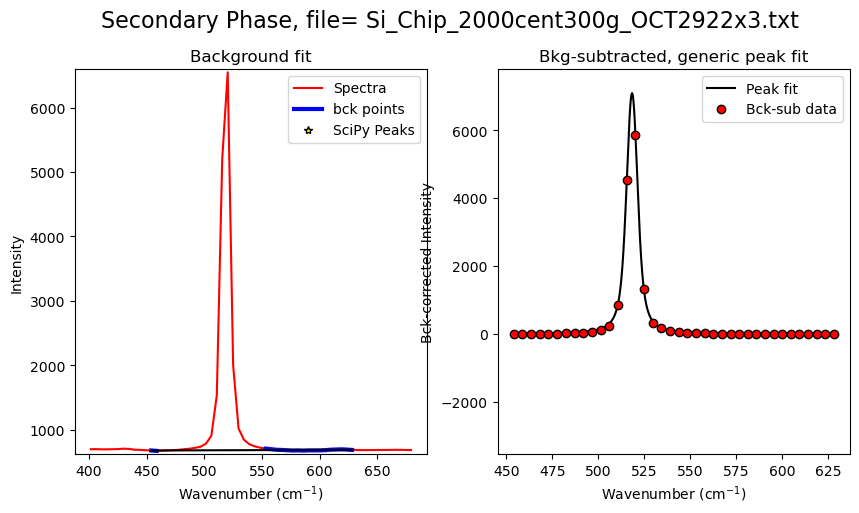

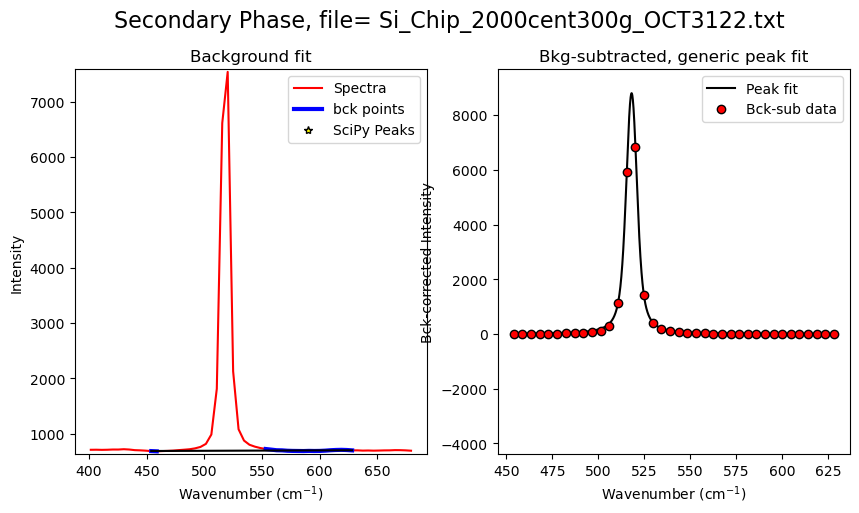

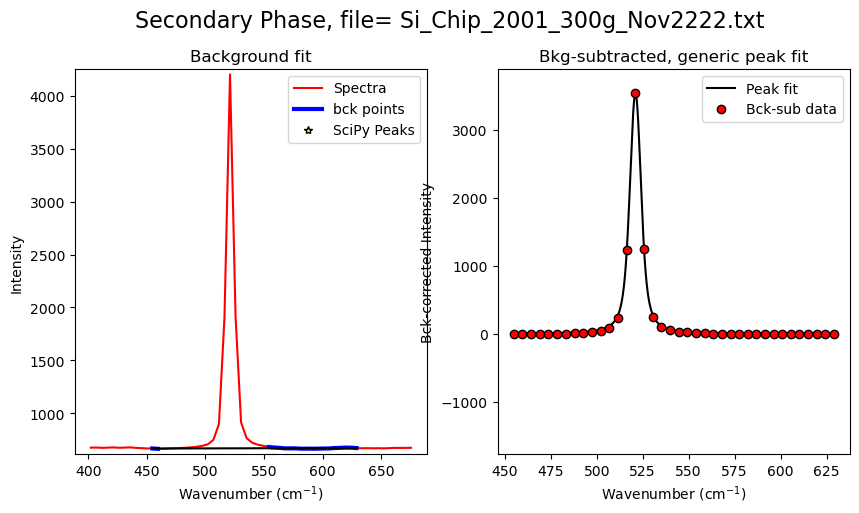

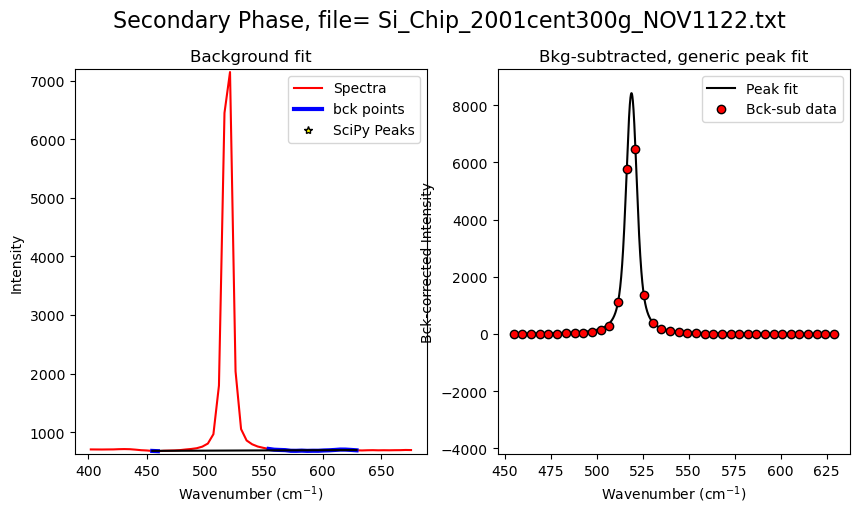

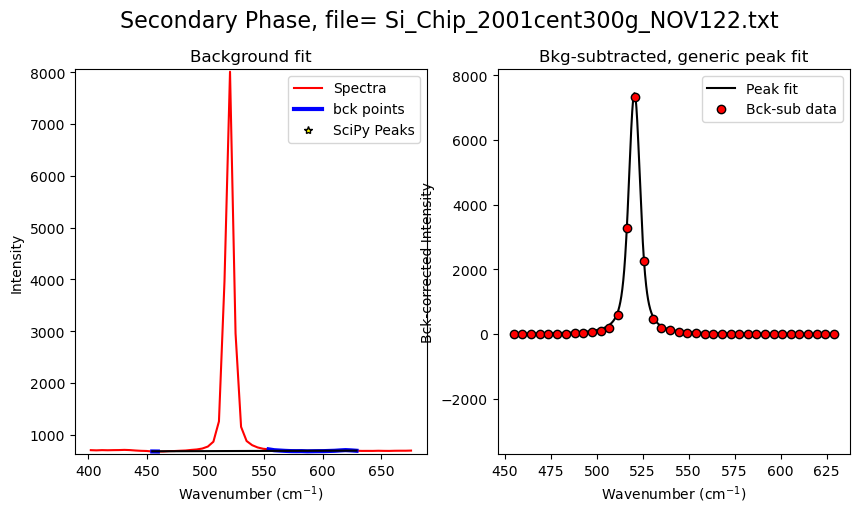

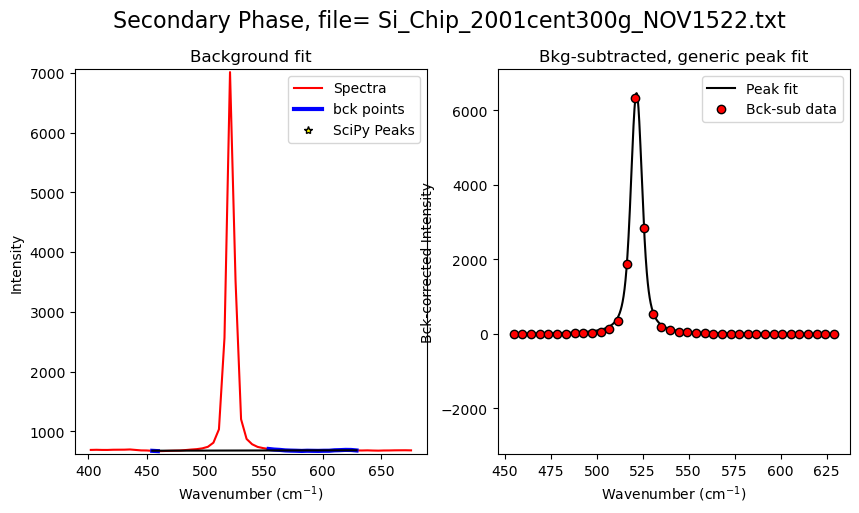

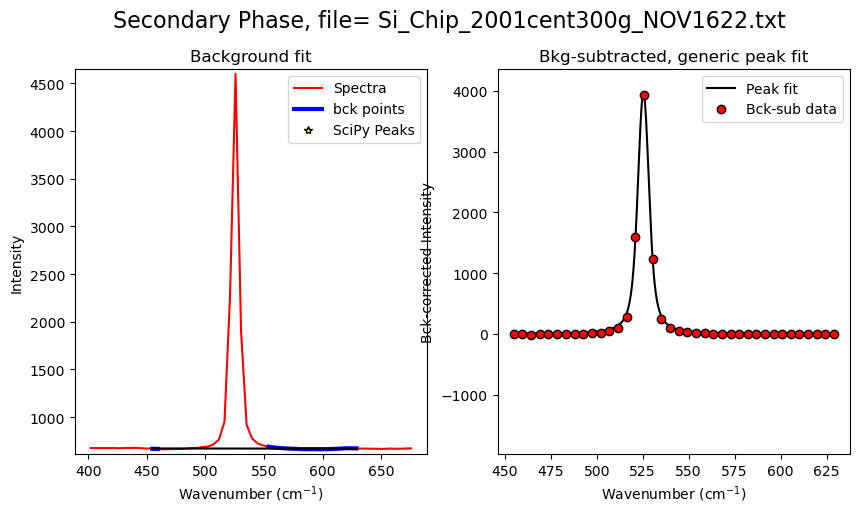

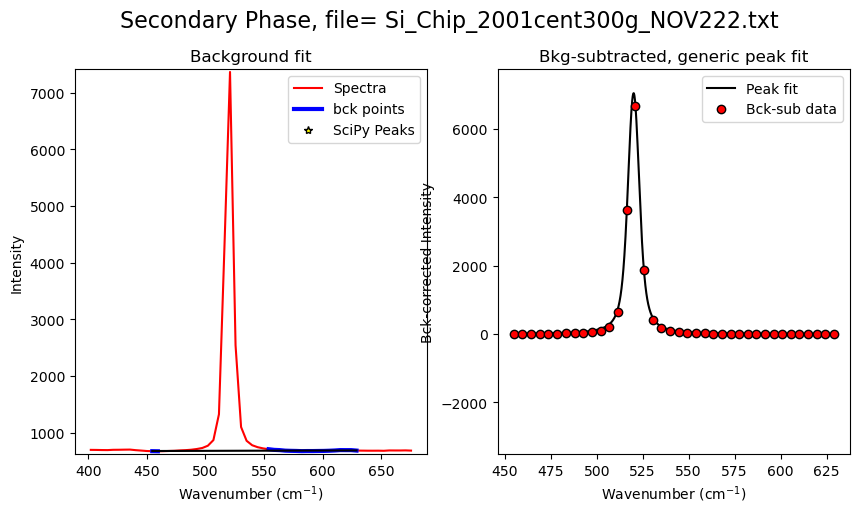

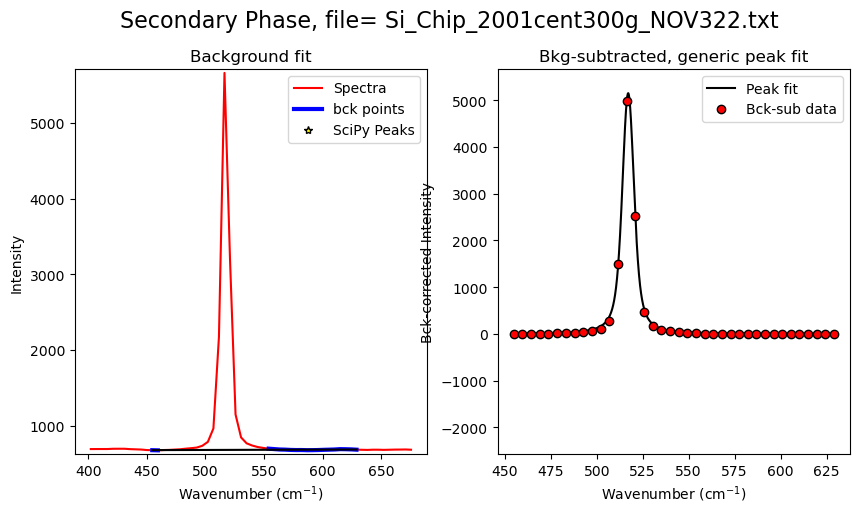

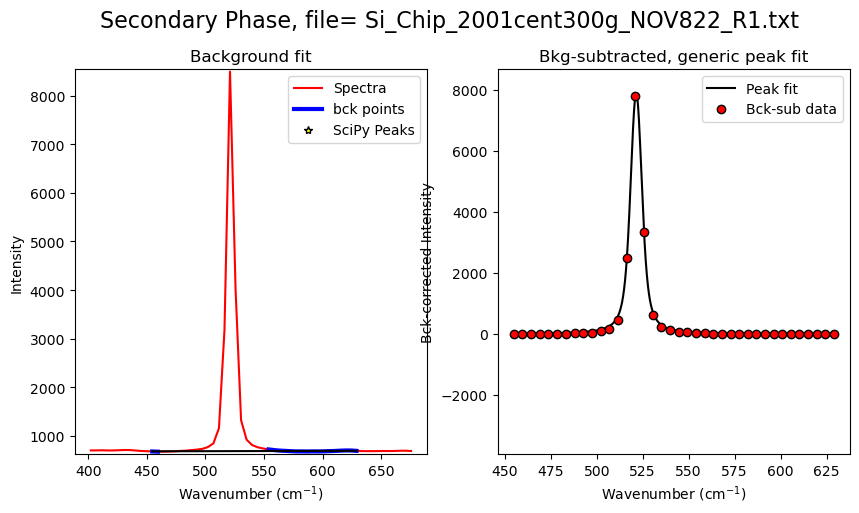

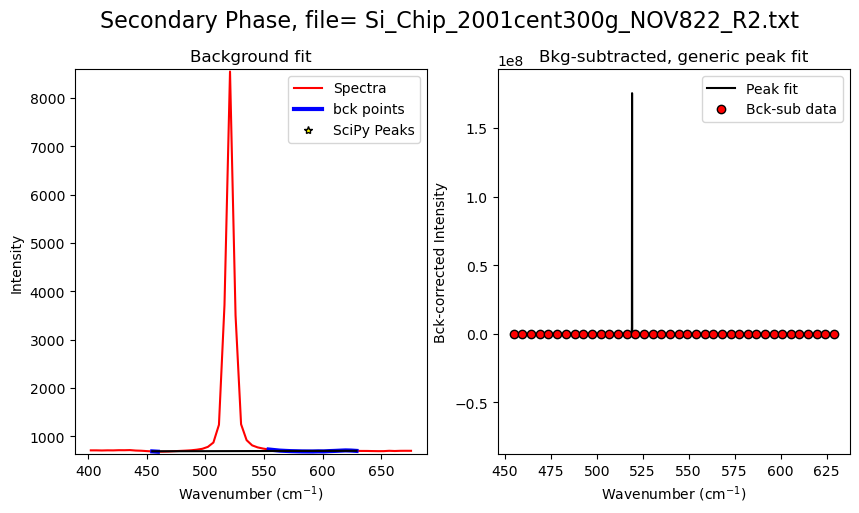

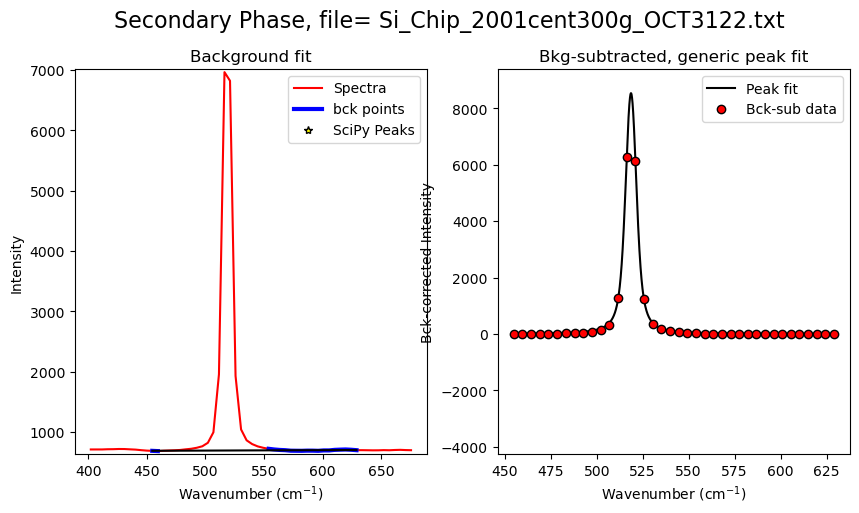

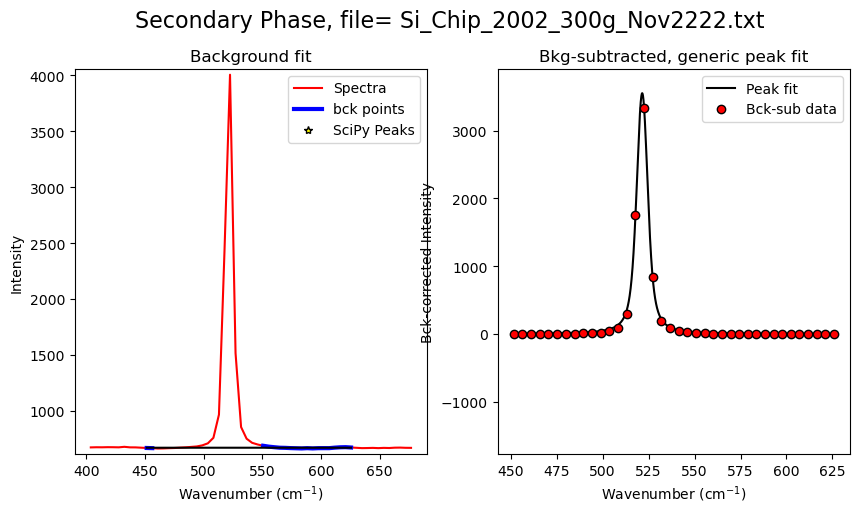

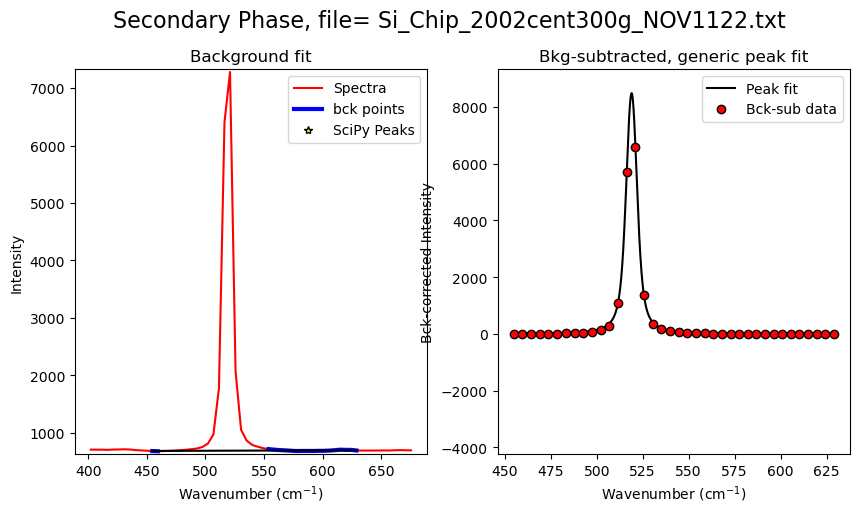

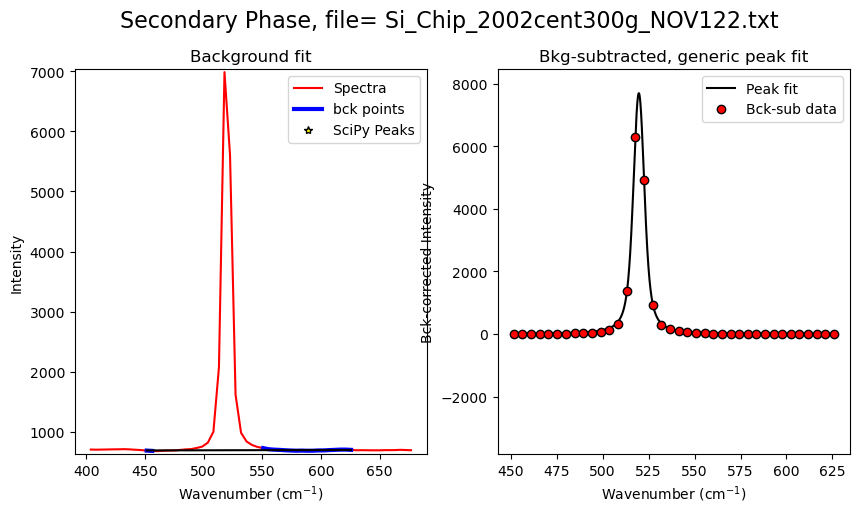

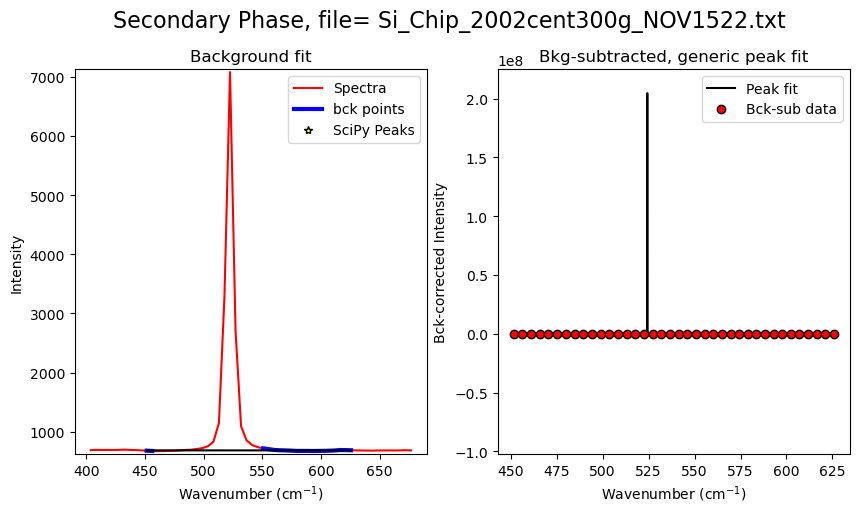

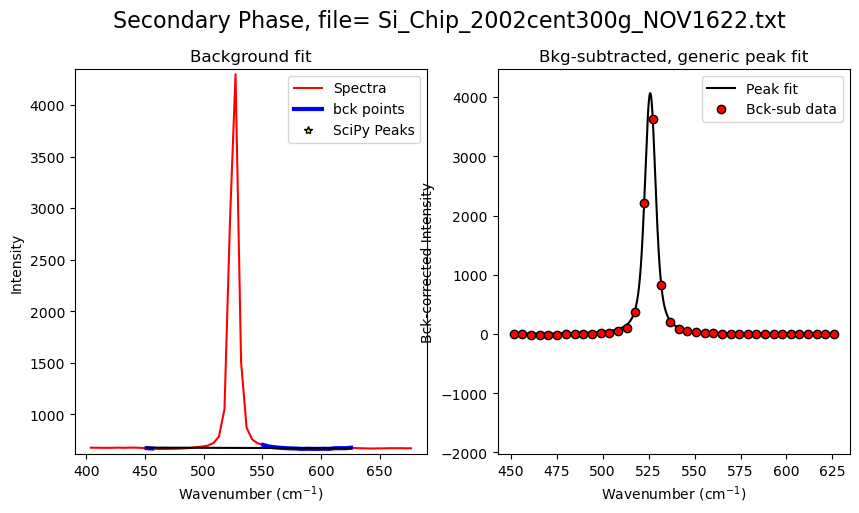

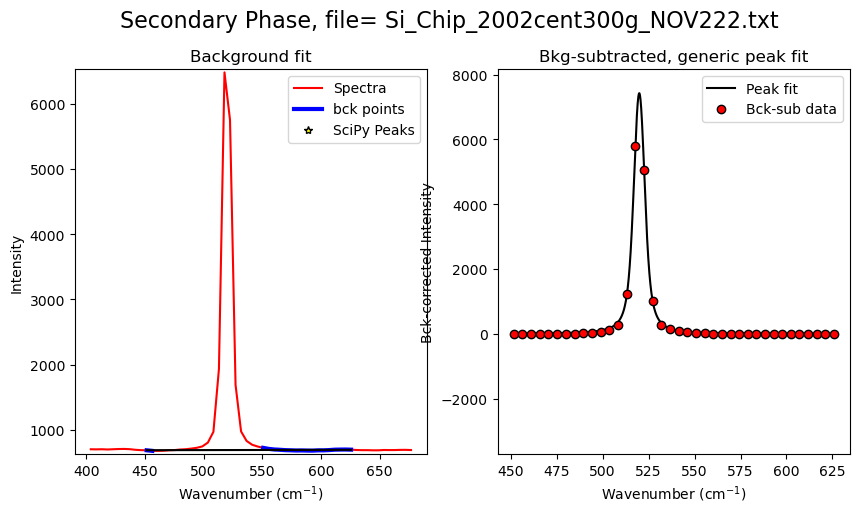

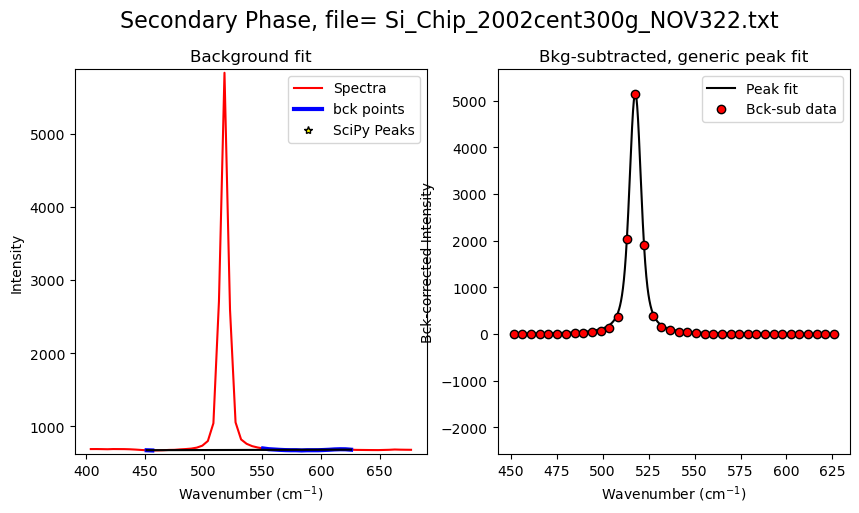

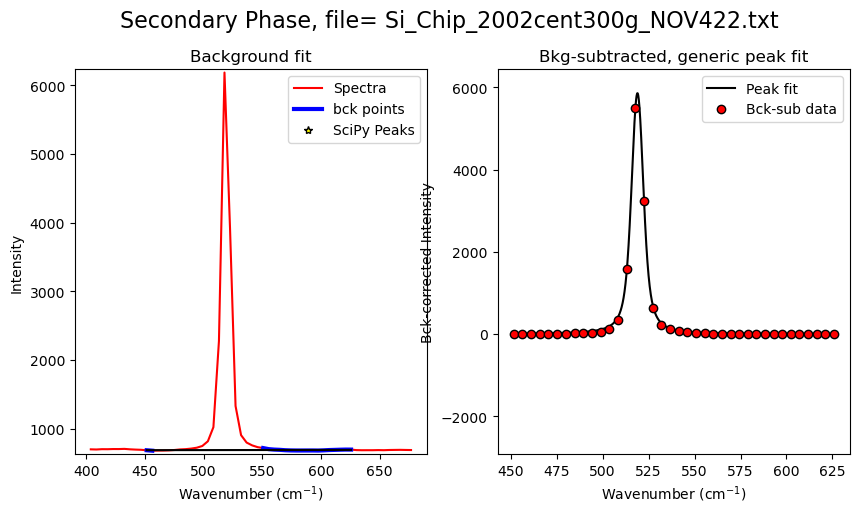

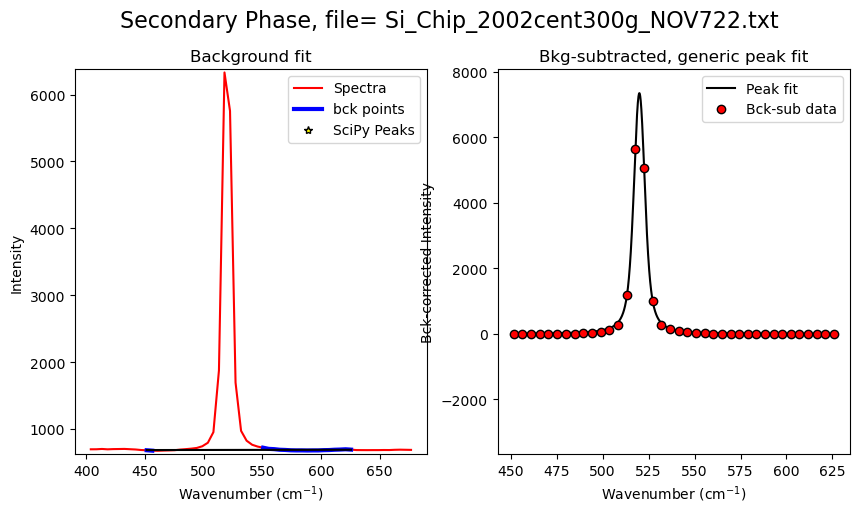

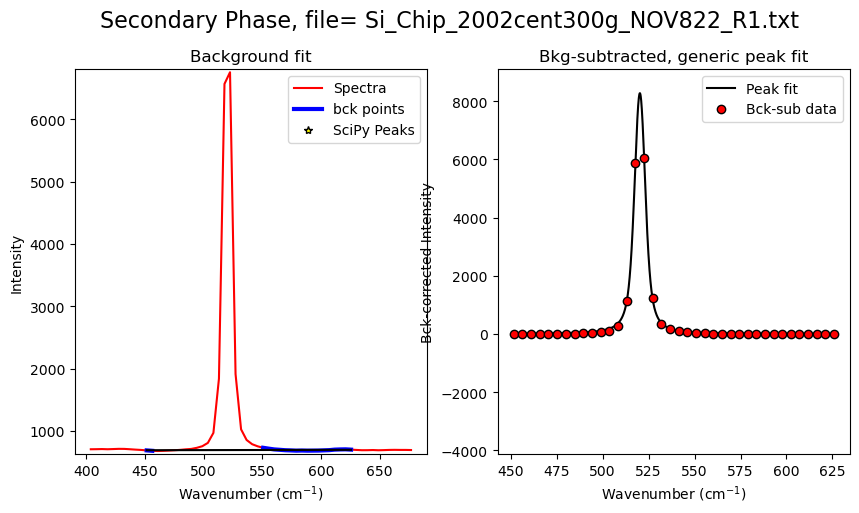

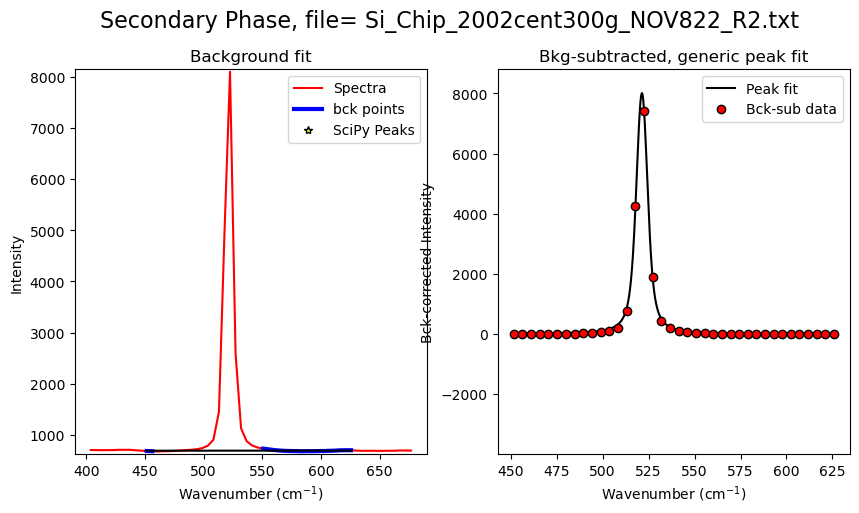

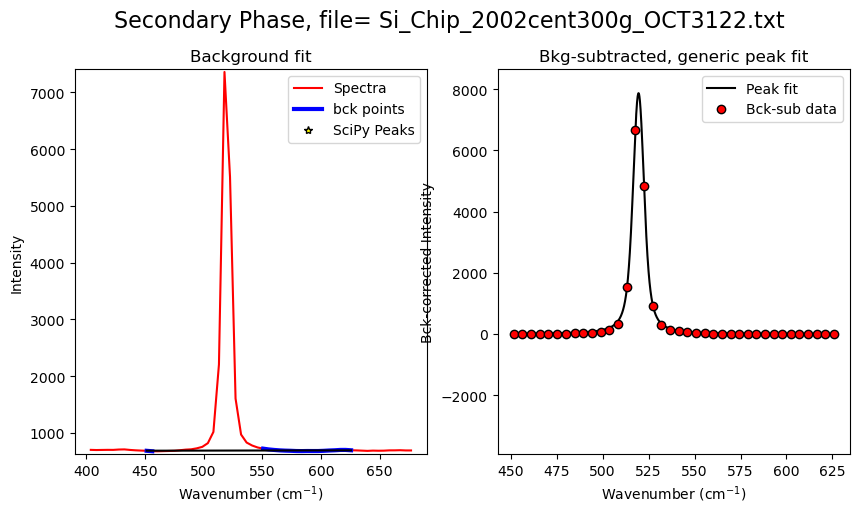

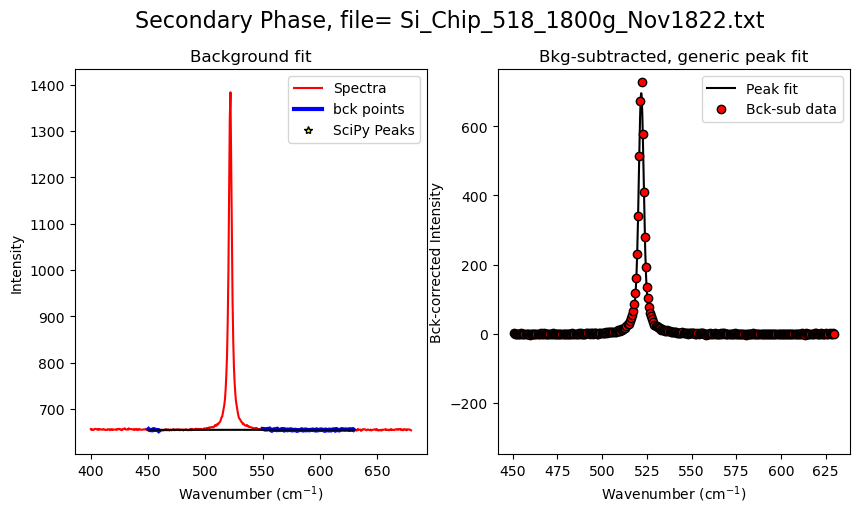

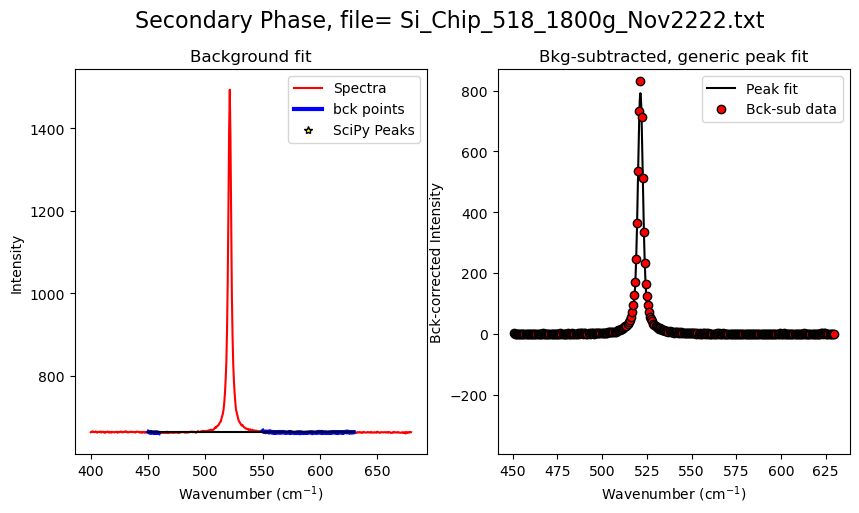

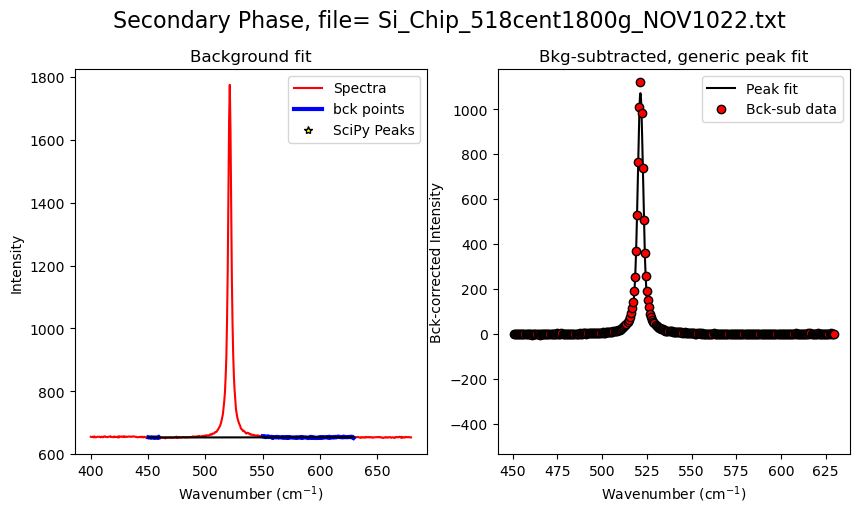

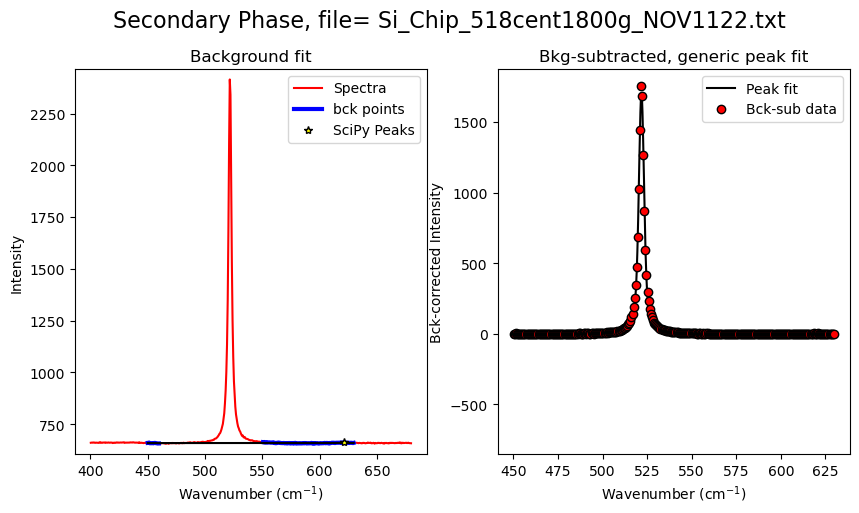

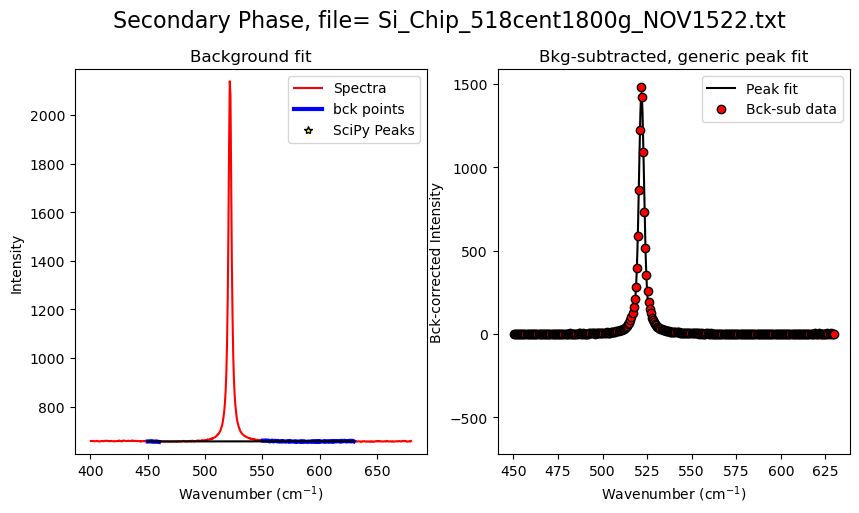

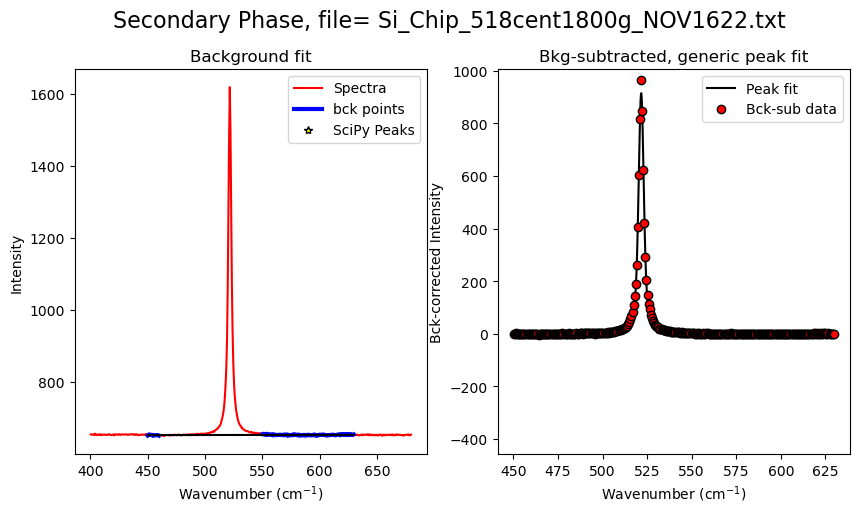

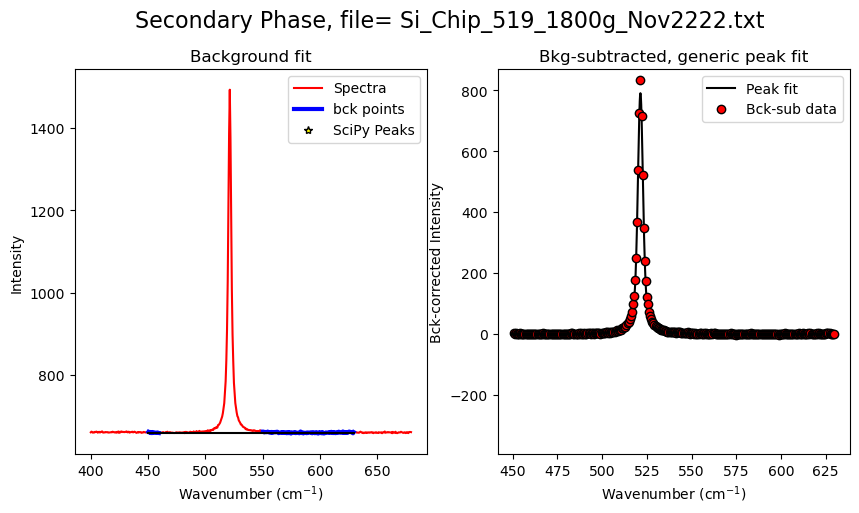

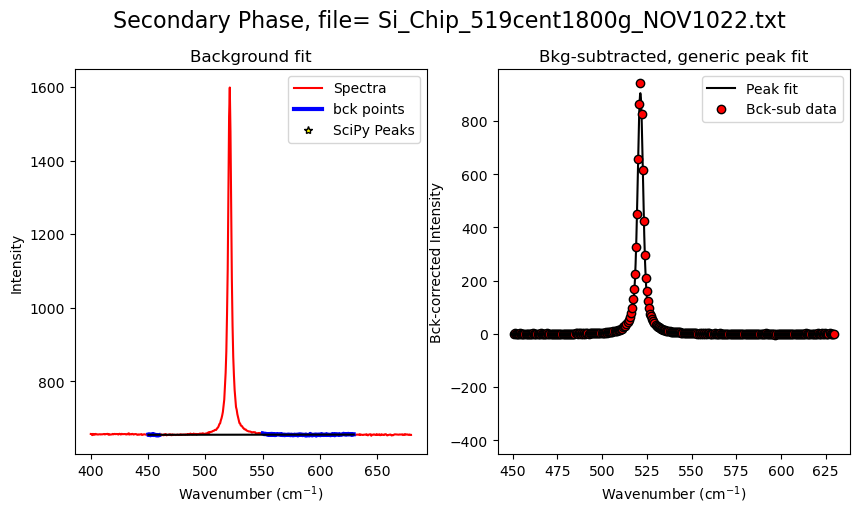

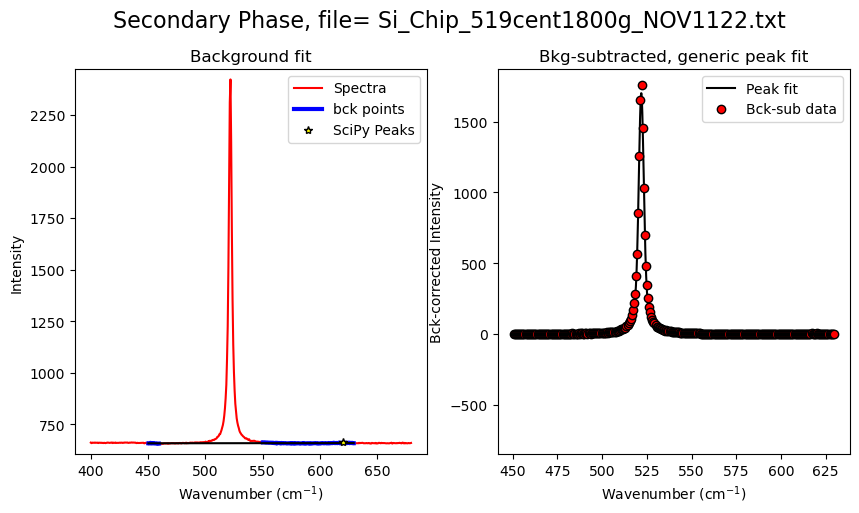

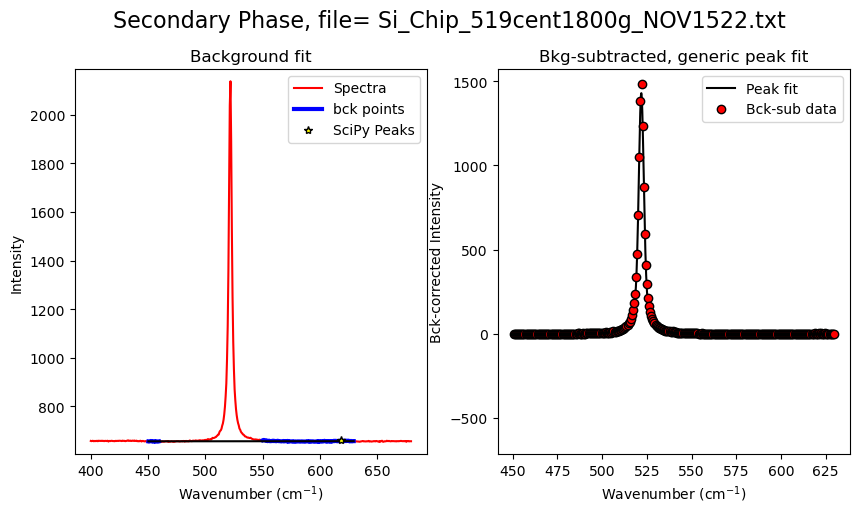

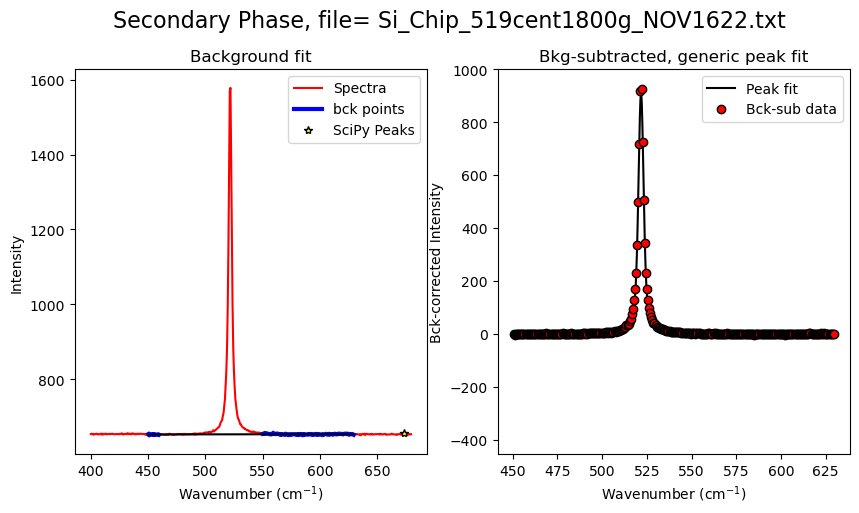

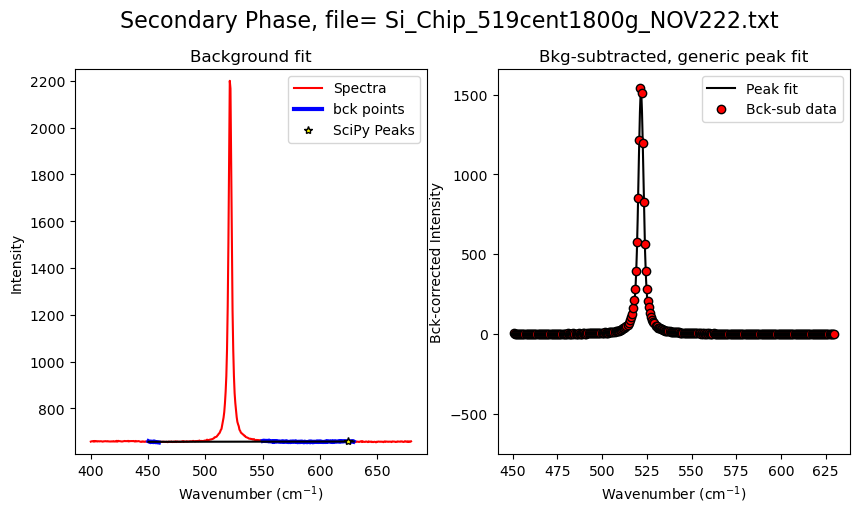

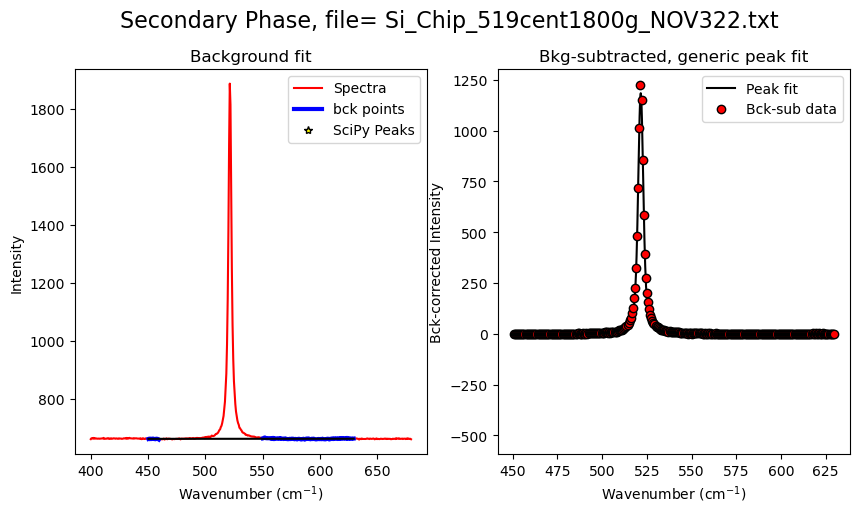

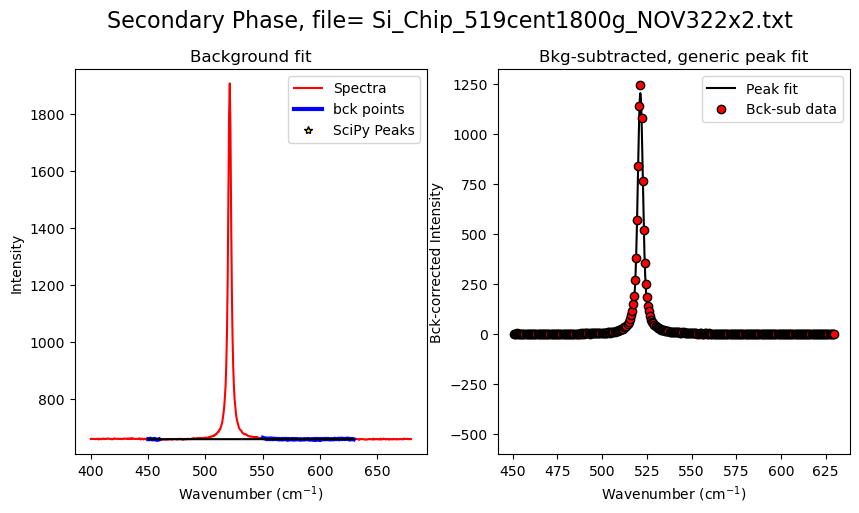

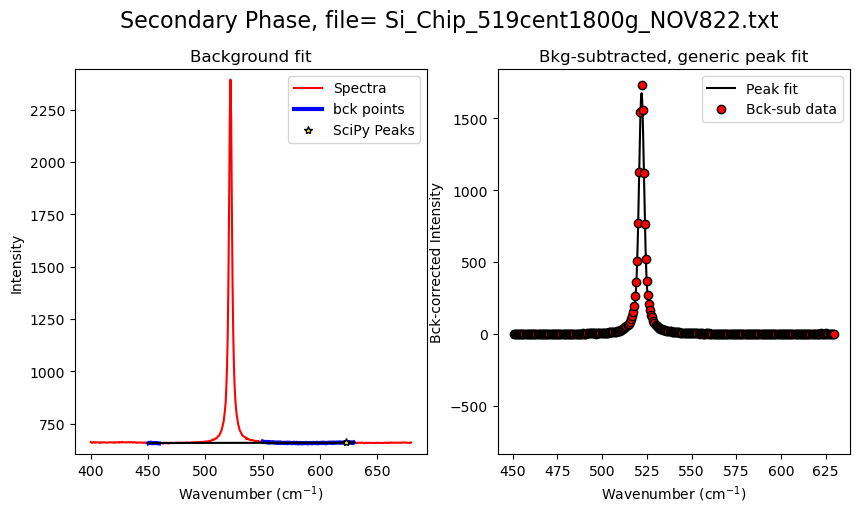

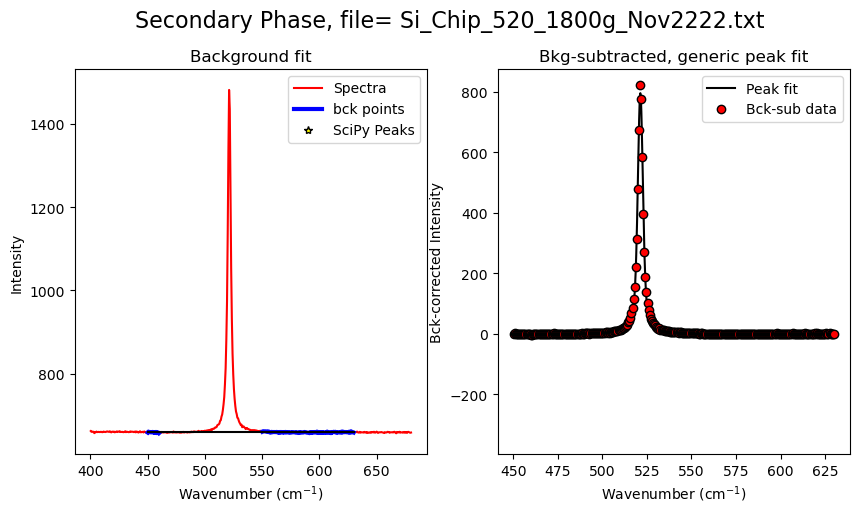

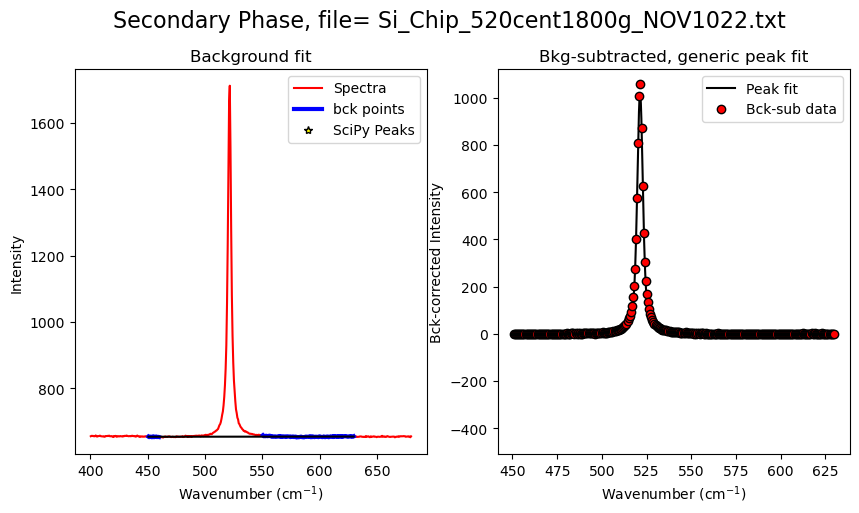

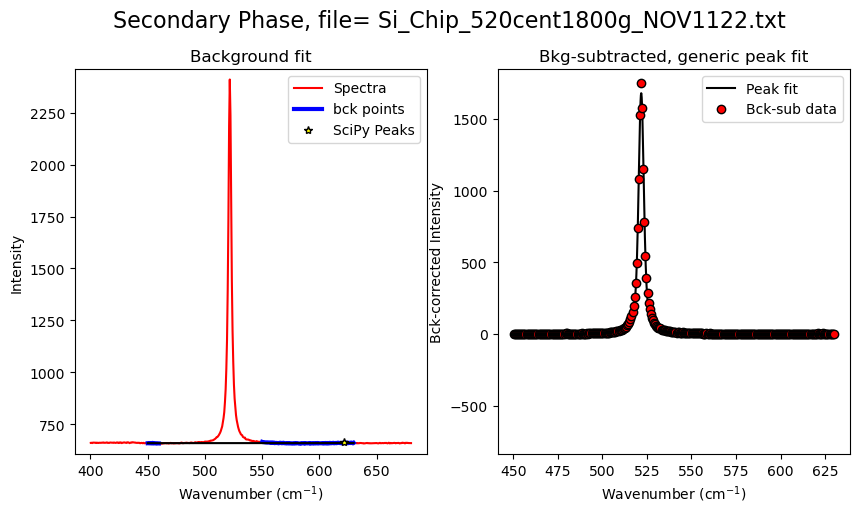

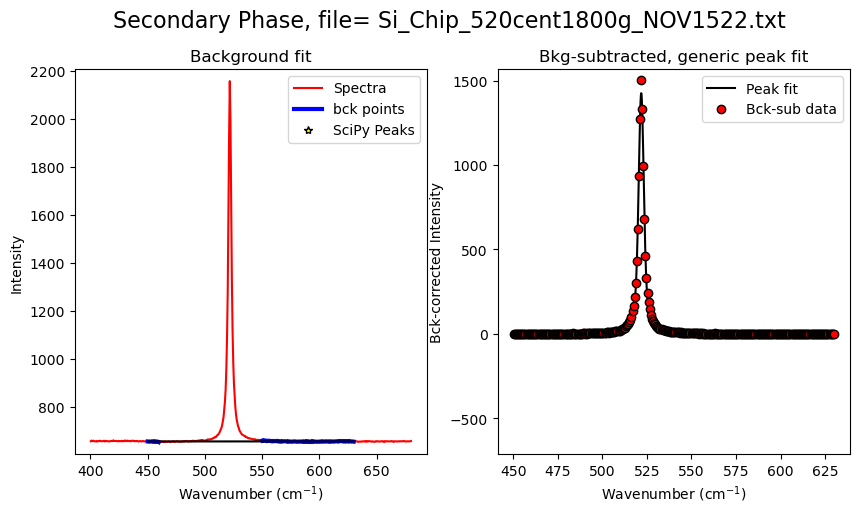

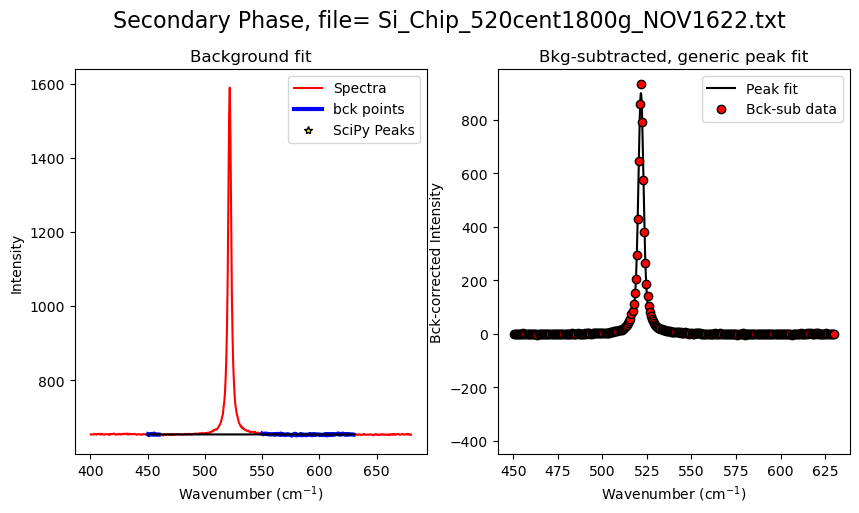

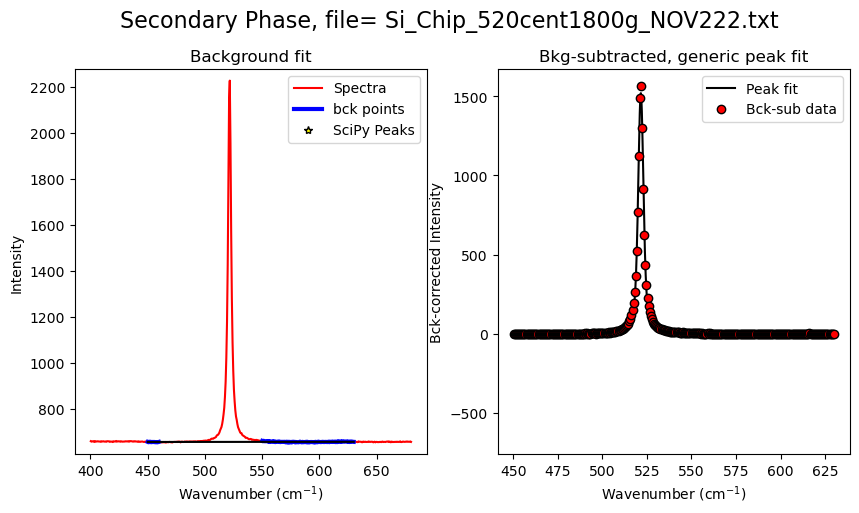

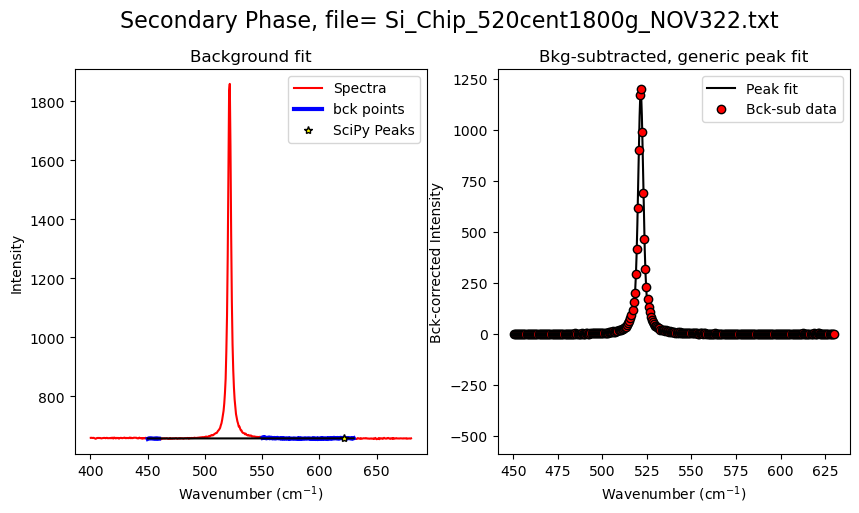

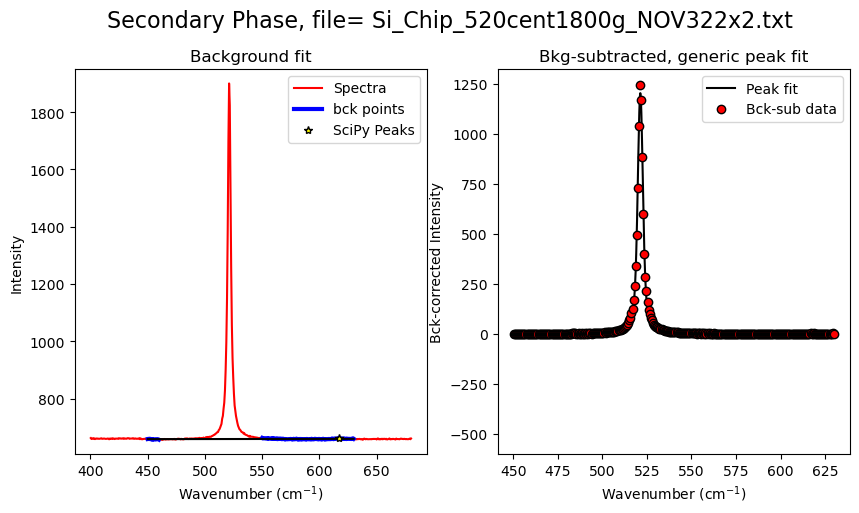

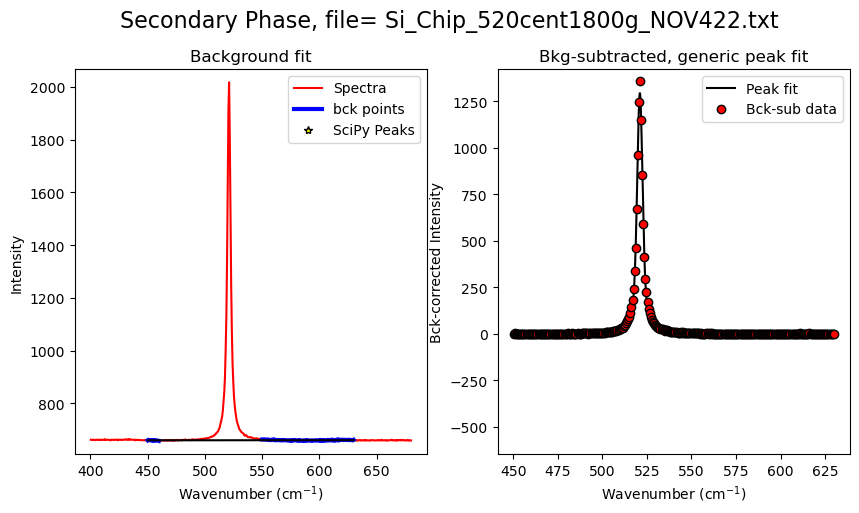

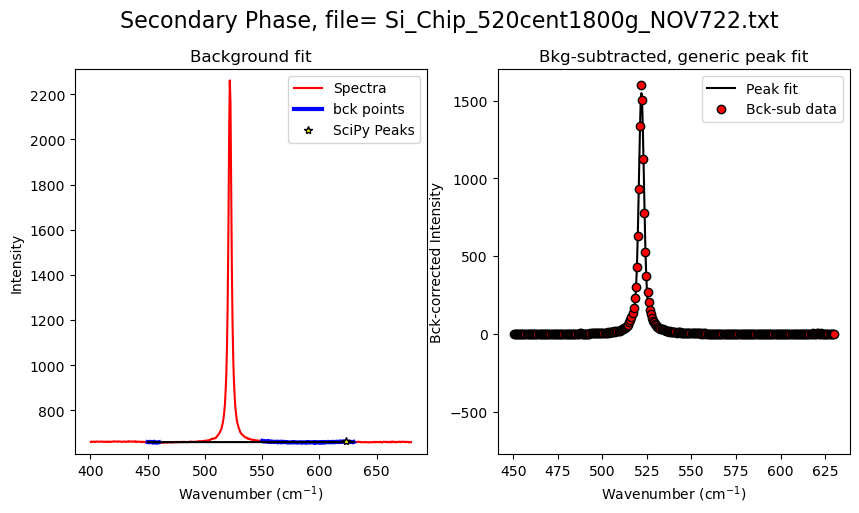

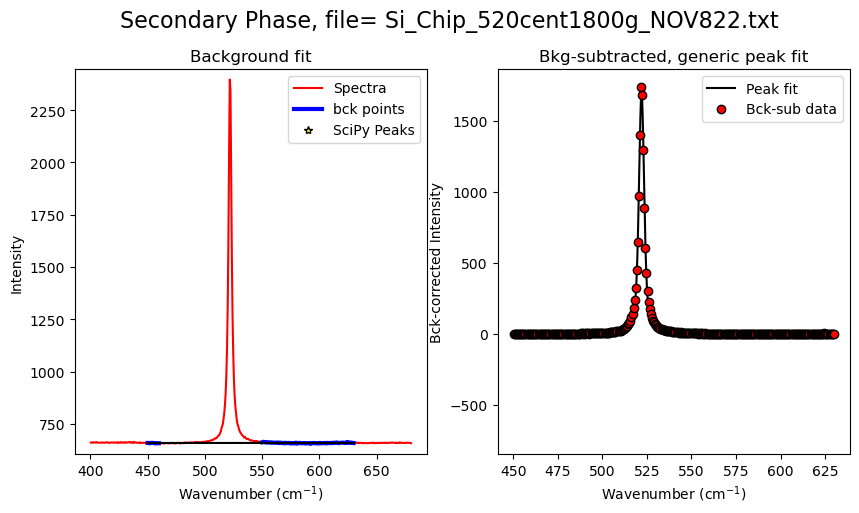

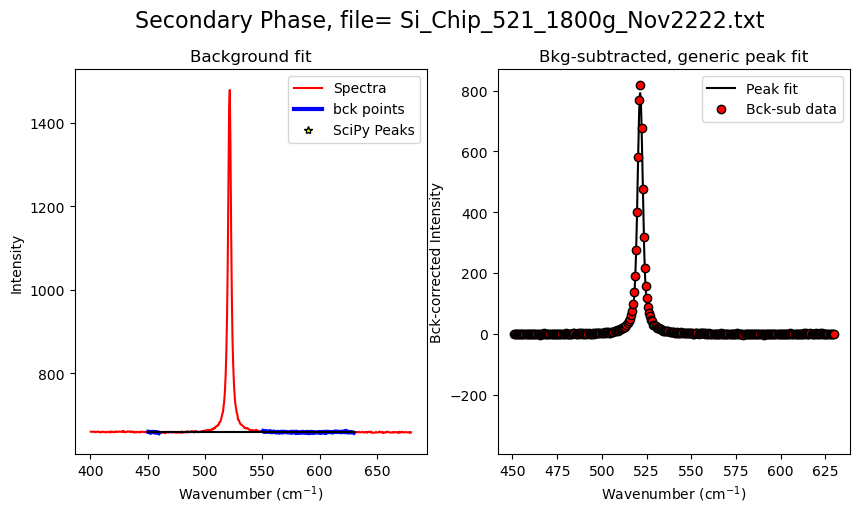

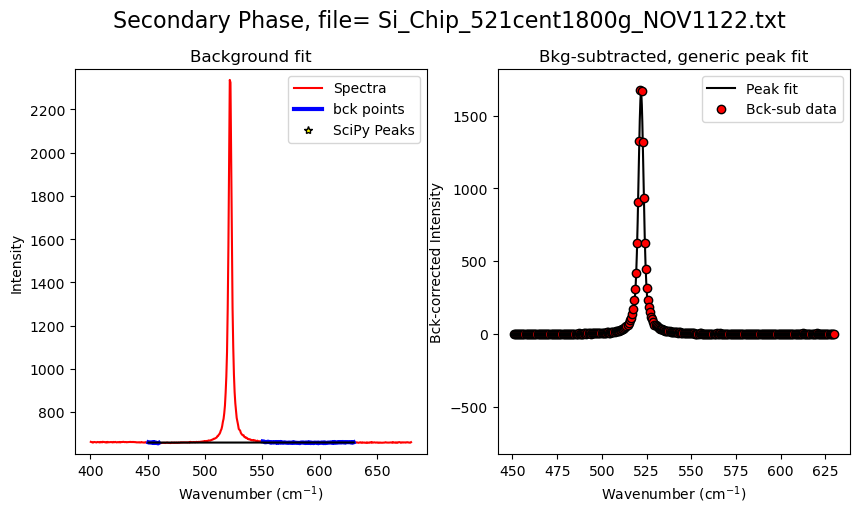

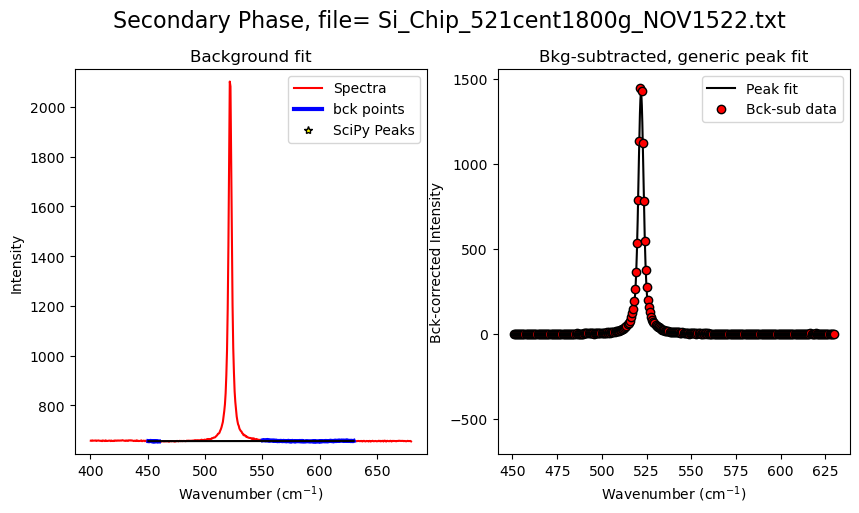

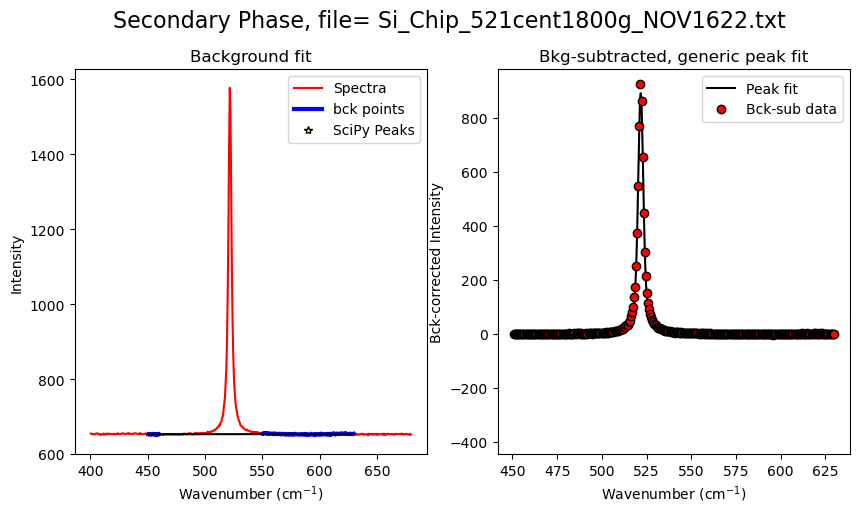

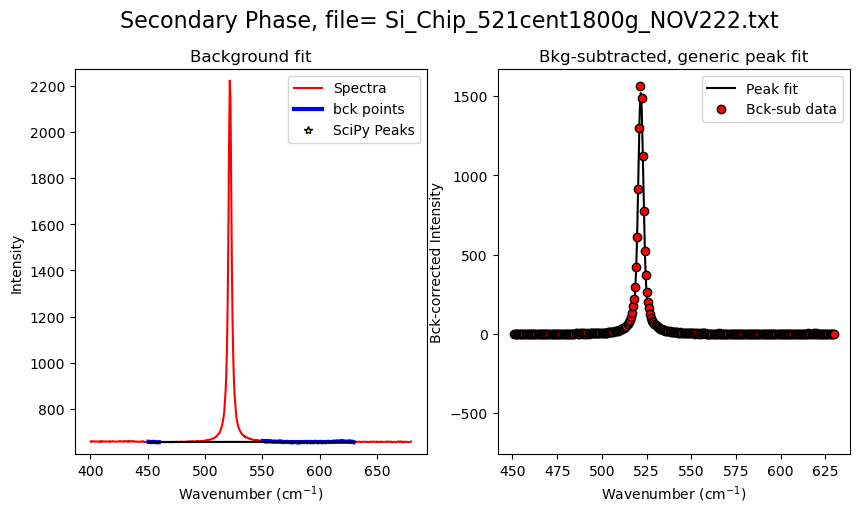

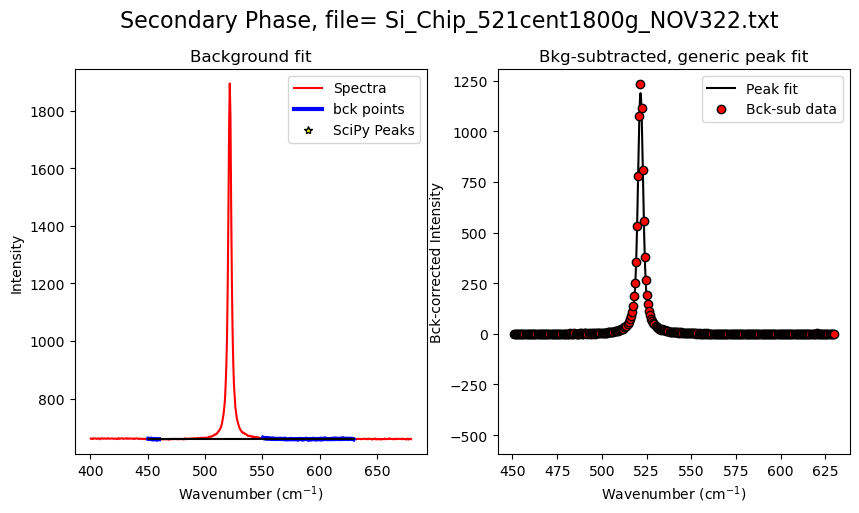

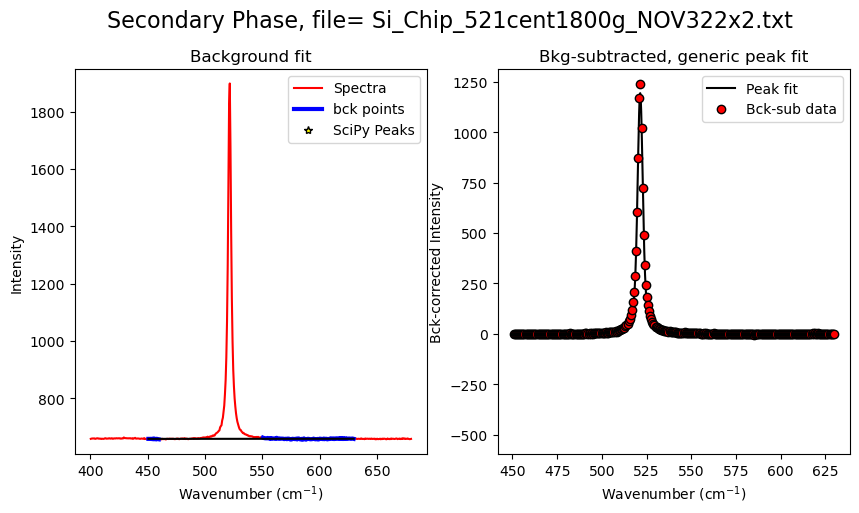

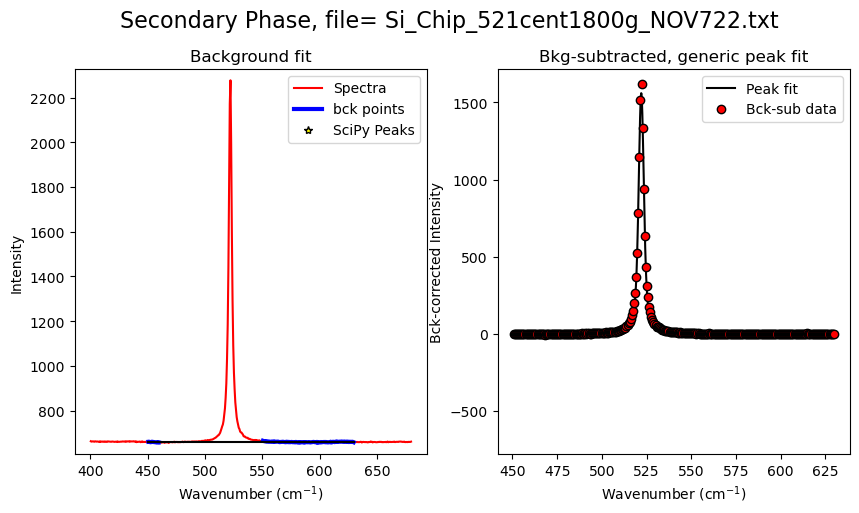

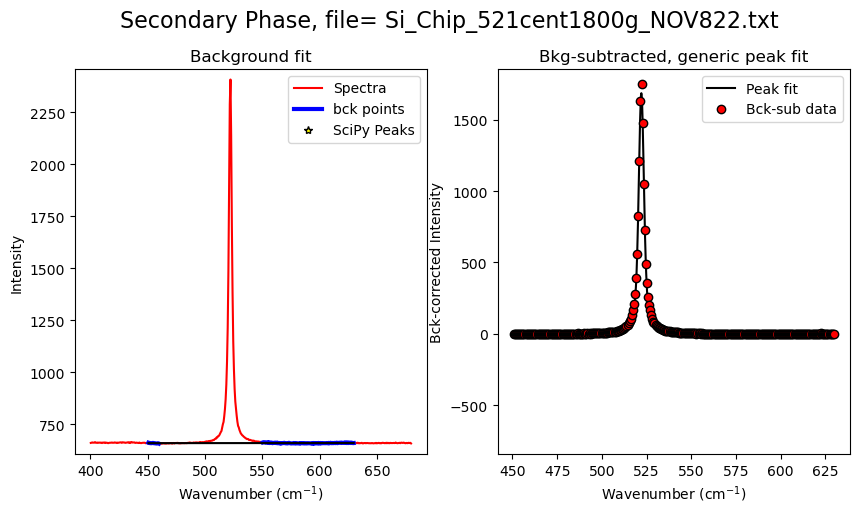

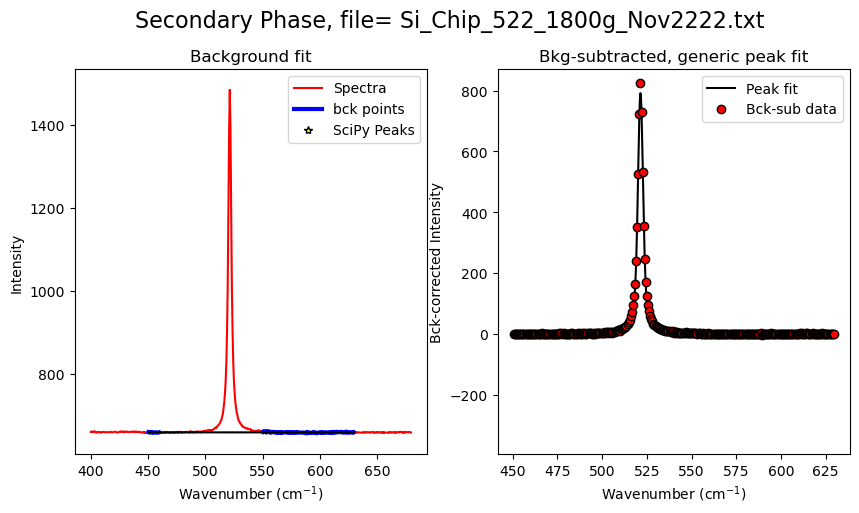

In [39]:
from tqdm import tqdm

df = pd.DataFrame([])
for i in tqdm(range(0, len(Si_files))):
    filename=Si_files[i]    
    Si_fit=pf.fit_generic_peak(config=generic_params, path=spectra_path, 
    filename=filename, filetype='headless_txt',
    plot_figure=True)
    Si_fit.loc[0,'filename']=filename
    df = pd.concat([df, Si_fit], axis=0)

df2=df.reset_index(drop=True)

(0.0, 10000.0)

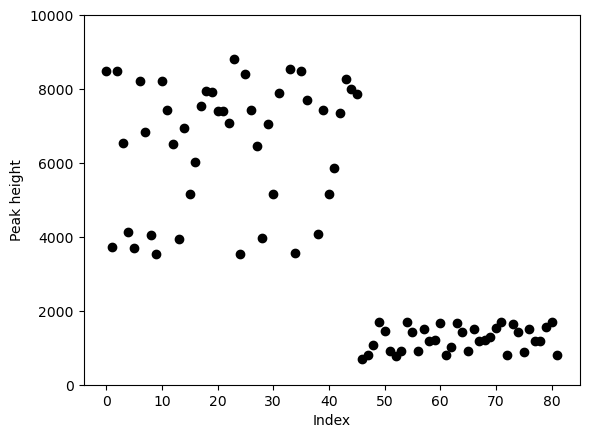

In [50]:
plt.plot(df2.index, df2['Peak_Height_generic'], 'ok')
plt.ylabel('Peak height')
plt.xlabel('Index')
plt.ylim([0, 10000])

(0.0, 50000.0)

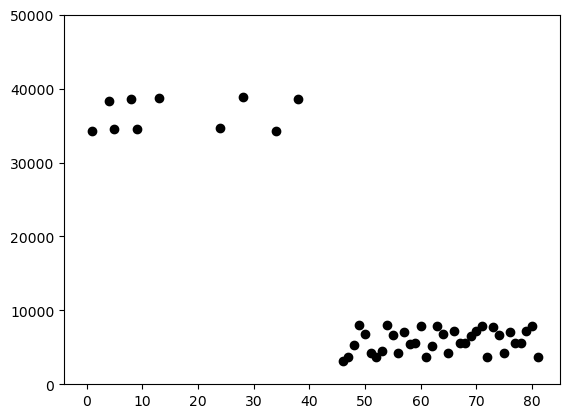

In [49]:
plt.plot(df2.index, df2['Peak_Area_generic'], 'ok')
plt.ylim([0, 50000])

In [ ]:
# remove these to get the pure file name you can compare 
file_m=pf.extracting_filenames_generic(names=meta['filename'],
    prefix=False,
    suffix=False,
   file_type='.txt')

file_m

array(['Si_50X300g_postpin', 'Si_Chip_1998_300g_Nov2222',
       'Si_Chip_1998cent300g_NOV1122', 'Si_Chip_1998cent300g_NOV1522',
       'Si_Chip_1998cent300g_NOV1622', 'Si_Chip_1999_300g_Nov2222',
       'Si_Chip_1999cent300g_NOV1122', 'Si_Chip_1999cent300g_NOV1522',
       'Si_Chip_1999cent300g_NOV1622', 'Si_Chip_2000_300g_Nov2222',
       'Si_Chip_2000cent300g_NOV1122', 'Si_Chip_2000cent300g_NOV122',
       'Si_Chip_2000cent300g_NOV1522', 'Si_Chip_2000cent300g_NOV1622',
       'Si_Chip_2000cent300g_NOV222', 'Si_Chip_2000cent300g_NOV322',
       'Si_Chip_2000cent300g_NOV422', 'Si_Chip_2000cent300g_NOV722',
       'Si_Chip_2000cent300g_NOV822_R1', 'Si_Chip_2000cent300g_NOV822_R2',
       'Si_Chip_2000cent300g_OCT2922x1', 'Si_Chip_2000cent300g_OCT2922x2',
       'Si_Chip_2000cent300g_OCT2922x3', 'Si_Chip_2000cent300g_OCT3122',
       'Si_Chip_2001_300g_Nov2222', 'Si_Chip_2001cent300g_NOV1122',
       'Si_Chip_2001cent300g_NOV122', 'Si_Chip_2001cent300g_NOV1522',
       'Si_Chip_2001cent

In [ ]:
name=meta['filename'].iloc[0]
name

'Si_50X300g_postpin.txt'

In [ ]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(names=df2['filename'],
    prefix=False, suffix=False,
   file_type='.txt')
file_s

array(['Si_50X300g_postpin', 'Si_Chip_1998_300g_Nov2222',
       'Si_Chip_1998cent300g_NOV1122', 'Si_Chip_1998cent300g_NOV1522',
       'Si_Chip_1998cent300g_NOV1622', 'Si_Chip_1999_300g_Nov2222',
       'Si_Chip_1999cent300g_NOV1122', 'Si_Chip_1999cent300g_NOV1522',
       'Si_Chip_1999cent300g_NOV1622', 'Si_Chip_2000_300g_Nov2222',
       'Si_Chip_2000cent300g_NOV1122', 'Si_Chip_2000cent300g_NOV122',
       'Si_Chip_2000cent300g_NOV1522', 'Si_Chip_2000cent300g_NOV1622',
       'Si_Chip_2000cent300g_NOV222', 'Si_Chip_2000cent300g_NOV322',
       'Si_Chip_2000cent300g_NOV422', 'Si_Chip_2000cent300g_NOV722',
       'Si_Chip_2000cent300g_NOV822_R1', 'Si_Chip_2000cent300g_NOV822_R2',
       'Si_Chip_2000cent300g_OCT2922x1', 'Si_Chip_2000cent300g_OCT2922x2',
       'Si_Chip_2000cent300g_OCT2922x3', 'Si_Chip_2000cent300g_OCT3122',
       'Si_Chip_2001_300g_Nov2222', 'Si_Chip_2001cent300g_NOV1122',
       'Si_Chip_2001cent300g_NOV122', 'Si_Chip_2001cent300g_NOV1522',
       'Si_Chip_2001cent

In [ ]:
meta['name_for_matching']=file_m
df2['name_for_matching']=file_s

if 'filename' in df2:
    df2=df2.drop(columns=['filename'])

df_combo=meta.merge(df2, on='name_for_matching')

df_combo

filename               date  power (mW)  \
0              Si_50X300g_postpin.txt   October 28, 2022         NaN   
1       Si_Chip_1998_300g_Nov2222.txt  November 22, 2022         NaN   
2    Si_Chip_1998cent300g_NOV1122.txt  November 11, 2022         NaN   
3    Si_Chip_1998cent300g_NOV1522.txt  November 15, 2022         NaN   
4    Si_Chip_1998cent300g_NOV1622.txt  November 16, 2022         NaN   
..                                ...                ...         ...   
77    Si_Chip_521cent1800g_NOV322.txt   November 3, 2022         NaN   
78  Si_Chip_521cent1800g_NOV322x2.txt   November 3, 2022         NaN   
79    Si_Chip_521cent1800g_NOV722.txt   November 7, 2022         NaN   
80    Si_Chip_521cent1800g_NOV822.txt   November 8, 2022         NaN   
81      Si_Chip_522_1800g_Nov2222.txt  November 22, 2022         NaN   

    Int_time (s)  accumulations  Mag (X)            duration      24hr_time  \
0            0.5           10.0     50.0  ['0h', '0m', '8s']  11:25:46 AM\n   
1            0.5           10.0     50.0  ['0h', '0m', '9s']  10:04:08 AM\n   
2            0.5           10.0     50.0  ['0h', '0m', '7s']  11:07:47 AM\n   
3            0.5           10.0     50.0  ['0h', '0m', '8s']  11:37:22 AM\n   
4            0.5           10.0     50.0  ['0h', '0m', '8s']   4:48:11 PM\n   
..           ...            ...      ...                 ...            ...   
77           0.5           10.0     50.0  ['0h', '0m', '7s']  10:48:25 AM\n   
78           0.5           10.0     50.0  ['0h', '0m', '7s']  10:51:30 AM\n   
79           0.5           10.0     50.0  ['0h', '0m', '7s']  10:42:44 AM\n   
80           0.5           10.0     50.0  ['0h', '0m', '7s']  11:29:11 AM\n   
81           0.5           10.0     50.0  ['0h', '0m', '7s']  10:02:44 AM\n   

    sec since midnight  Spectral Center  day#              name_for_matching  \
0              41146.0         2000.290   0.0             Si_50X300g_postpin   
1              36248.0         1997.737  25.0      Si_Chip_1998_300g_Nov2222   
2              40067.0         1997.737  14.0   Si_Chip_1998cent300g_NOV1122   
3              41842.0         1997.737  18.0   Si_Chip_1998cent300g_NOV1522   
4              60491.0         1997.737  19.0   Si_Chip_1998cent300g_NOV1622   
..                 ...              ...   ...                            ...   
77             38905.0          520.947   6.0    Si_Chip_521cent1800g_NOV322   
78             39090.0          520.947   6.0  Si_Chip_521cent1800g_NOV322x2   
79             38564.0          520.947  10.0    Si_Chip_521cent1800g_NOV722   
80             41351.0          520.947  11.0    Si_Chip_521cent1800g_NOV822   
81             36164.0          522.044  25.0      Si_Chip_522_1800g_Nov2222   

    Peak_Cent_generic  Peak_Area_generic  Peak_Height_generic  
0          520.664524       84902.217592          8472.580257  
1          520.014661       34246.985279          3726.432408  
2          519.981390       81018.987766          8509.110317  
3          520.787402       63040.833067          6539.921808  
4          524.664164       38447.268181          4132.840944  
..                ...                ...                  ...  
77         521.588403        5567.590726          1187.703731  
78         521.392709        5601.603703          1193.627697  
79         521.995431        7263.850830          1558.706255  
80         522.042713        7930.685600          1686.208793  
81         521.452841        3671.372719           791.456654  

[82 rows x 15 columns]

In [ ]:
idnm='111622_Si_chip' ## Update file tag for exporting

In [ ]:
nm=idnm #string name for excel file
outpath=r"P:\WORK-GENERAL\POSTDOC-UCB\BERKELEY-VIBE\Si_chips\OUTPUT"
df_combo.to_excel(outpath+'/'+nm+".xlsx")

In [ ]:
from math import isclose
## This adds a "Grating" column and then loops over dataframe to assign grating based on spectral central, eventually probably want to 
## extract that from the metadata instead

if 'Grating' in df_combo.columns:
    df_combo.drop(['Grating'],axis=1)
else:
    df_combo.insert(9,'Grating',0)

for grat in df_combo.index:
    if isclose(df_combo['Spectral Center'][grat],2000,abs_tol=10)==True:
        df_combo.loc[grat,'Grating']=300
    elif isclose(df_combo['Spectral Center'][grat],520,abs_tol=10)==True:
        df_combo.loc[grat,'Grating']=1800

p0_300=df_combo[(df_combo['day#']==0)&(df_combo['Grating']==300)].reset_index(drop=True)
p0_1800=df_combo[(df_combo['day#']==5)&(df_combo['Grating']==1800)].reset_index(drop=True)

for index in df_combo.index:
    if df_combo.loc[index,'Grating']==300:
        df_combo.loc[index,'Peak Height Difference']=100*(df_combo.loc[index,'Peak_Heightcarbonate']-p0_300['Peak_Height'][0])/p0_300['Peak_Height'][0]
    elif df_combo.loc[index,'Grating']==1800:
        df_combo.loc[index,'Peak Height Difference']=100*(df_combo.loc[index,'Peak_Height']-p0_1800['Peak_Height'][0])/p0_1800['Peak_Height'][0]
df_combo

filename               date  power (mW)  \
0              Si_50X300g_postpin.txt   October 28, 2022         NaN   
1       Si_Chip_1998_300g_Nov2222.txt  November 22, 2022         NaN   
2    Si_Chip_1998cent300g_NOV1122.txt  November 11, 2022         NaN   
3    Si_Chip_1998cent300g_NOV1522.txt  November 15, 2022         NaN   
4    Si_Chip_1998cent300g_NOV1622.txt  November 16, 2022         NaN   
..                                ...                ...         ...   
77    Si_Chip_521cent1800g_NOV322.txt   November 3, 2022         NaN   
78  Si_Chip_521cent1800g_NOV322x2.txt   November 3, 2022         NaN   
79    Si_Chip_521cent1800g_NOV722.txt   November 7, 2022         NaN   
80    Si_Chip_521cent1800g_NOV822.txt   November 8, 2022         NaN   
81      Si_Chip_522_1800g_Nov2222.txt  November 22, 2022         NaN   

    Int_time (s)  accumulations  Mag (X)            duration      24hr_time  \
0            0.5           10.0     50.0  ['0h', '0m', '8s']  11:25:46 AM\n   
1            0.5           10.0     50.0  ['0h', '0m', '9s']  10:04:08 AM\n   
2            0.5           10.0     50.0  ['0h', '0m', '7s']  11:07:47 AM\n   
3            0.5           10.0     50.0  ['0h', '0m', '8s']  11:37:22 AM\n   
4            0.5           10.0     50.0  ['0h', '0m', '8s']   4:48:11 PM\n   
..           ...            ...      ...                 ...            ...   
77           0.5           10.0     50.0  ['0h', '0m', '7s']  10:48:25 AM\n   
78           0.5           10.0     50.0  ['0h', '0m', '7s']  10:51:30 AM\n   
79           0.5           10.0     50.0  ['0h', '0m', '7s']  10:42:44 AM\n   
80           0.5           10.0     50.0  ['0h', '0m', '7s']  11:29:11 AM\n   
81           0.5           10.0     50.0  ['0h', '0m', '7s']  10:02:44 AM\n   

    sec since midnight  Grating  Spectral Center  day#  \
0              41146.0      300         2000.290   0.0   
1              36248.0      300         1997.737  25.0   
2              40067.0      300         1997.737  14.0   
3              41842.0      300         1997.737  18.0   
4              60491.0      300         1997.737  19.0   
..                 ...      ...              ...   ...   
77             38905.0     1800          520.947   6.0   
78             39090.0     1800          520.947   6.0   
79             38564.0     1800          520.947  10.0   
80             41351.0     1800          520.947  11.0   
81             36164.0     1800          522.044  25.0   

                name_for_matching  Peak_Cent_generic  Peak_Area_generic  \
0              Si_50X300g_postpin         520.664524       84902.217592   
1       Si_Chip_1998_300g_Nov2222         520.014661       34246.985279   
2    Si_Chip_1998cent300g_NOV1122         519.981390       81018.987766   
3    Si_Chip_1998cent300g_NOV1522         520.787402       63040.833067   
4    Si_Chip_1998cent300g_NOV1622         524.664164       38447.268181   
..                            ...                ...                ...   
77    Si_Chip_521cent1800g_NOV322         521.588403        5567.590726   
78  Si_Chip_521cent1800g_NOV322x2         521.392709        5601.603703   
79    Si_Chip_521cent1800g_NOV722         521.995431        7263.850830   
80    Si_Chip_521cent1800g_NOV822         522.042713        7930.685600   
81      Si_Chip_522_1800g_Nov2222         521.452841        3671.372719   

    Peak_Height_generic  Peak Height Difference  
0           8472.580257                0.000000  
1           3726.432408              -56.017738  
2           8509.110317                0.431156  
3           6539.921808              -22.810742  
4           4132.840944              -51.220988  
..                  ...                     ...  
77          1187.703731              -21.327638  
78          1193.627697              -20.935240  
79          1558.706255                3.247216  
80          1686.208793               11.692862  
81           791.456654              -47.574666  

[82 rows x 17 co

day#  Mean Peak Height  Stddeviation  Grating  Percent height difference  \
0    0.0      8.472580e+03  0.000000e+00    300.0                   0.000000   
1   25.0      3.612722e+03  8.688958e+01    300.0                 -57.359832   
2   14.0      8.385883e+03  1.278525e+02    300.0                  -1.023264   
3   18.0      6.564317e+03  1.493741e+02    300.0                 -22.522808   
4   19.0      4.029878e+03  7.372321e+01    300.0                 -52.436235   
5    4.0      7.516180e+03  1.318220e+02    300.0                 -11.288180   
6    5.0      7.139867e+03  2.132998e+02    300.0                 -15.729719   
7    6.0      5.152287e+03  3.282415e+00    300.0                 -39.188693   
8    7.0      7.421102e+06  7.415061e+06    300.0               87489.631243   
9   10.0      7.463656e+03  1.071724e+02    300.0                 -11.908106   
10  11.0      2.409259e+07  5.385482e+07    300.0              284259.525326   
11   1.0      7.315822e+03  1.529918e+02    300.0                 -13.652968   
12   3.0      8.421078e+03  4.004602e+02    300.0                  -0.607870   
13  21.0               NaN           NaN      NaN                        NaN   
14  13.0               NaN           NaN      NaN                        NaN   
15   0.0               NaN           NaN      NaN                        NaN   
16  25.0      7.918729e+02  1.236938e+00   1800.0                 -47.758545   
17  14.0      1.684597e+03  2.096910e+01   1800.0                  11.136296   
18  18.0      1.428728e+03  1.033815e+01   1800.0                  -5.743958   
19  19.0      9.039929e+02  8.818082e+00   1800.0                 -40.361760   
20   4.0               NaN           NaN      NaN                        NaN   
21   5.0      1.515794e+03  4.372947e+00   1800.0                   0.000000   
22   6.0      1.191779e+03  9.191177e+00   1800.0                 -21.375902   
23   7.0      1.293663e+03  0.000000e+00   1800.0                 -14.654429   
24  10.0      1.553374e+03  5.332643e+00   1800.0                   2.479194   
25  11.0      1.684717e+03  7.570720e+00   1800.0                  11.144153   
26   1.0               NaN           NaN      NaN                        NaN   
27   3.0               NaN           NaN      NaN                        NaN   
28  21.0      6.950313e+02  0.000000e+00   1800.0                 -54.147381   
29  13.0      9.981245e+02  6.937262e+01   1800.0                 -34.151714   

    Stdev Percent height difference  
0                          0.000000  
1                          1.025539  
2                          1.509015  
3                          1.763029  
4                          0.870139  
5                          1.555866  
6                          2.517530  
7                          0.038742  
8                      87518.334348  
9                          1.264932  
10                    635636.614017  
11                         1.805729  
12                         4.726544  
13                              NaN  
14                              NaN  
15                              NaN  
16                         0.081934  
17                         1.388973  
18                         0.684789  
19                         0.584101  
20                              NaN  
21                         0.289660  
22                         0.608815  
23                         0.000000  
24                         0.353229  
25                         0.501477  
26                              NaN  
27                              NaN  
28                         0.000000  
29                         4.595176

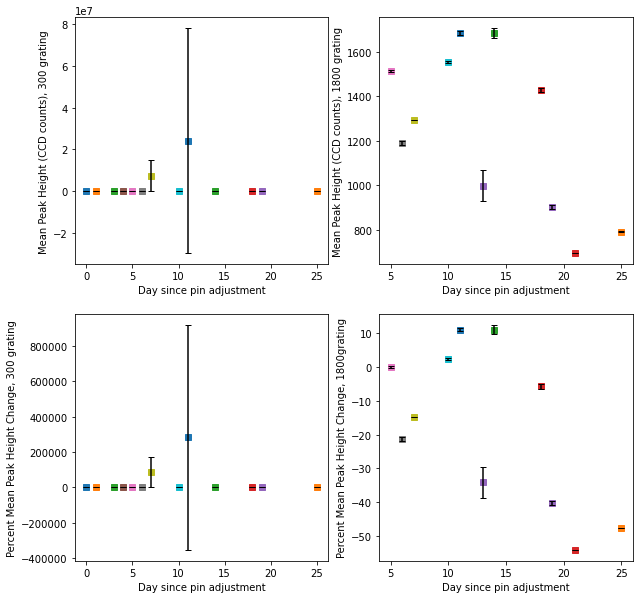

In [ ]:
## creates a dataframe that contains means of height per day and standard deviation for plotting
df_plot=pd.DataFrame([])
df_plot2=pd.DataFrame([])
df_1800=df_combo[df_combo['Grating']==1800]
df_300=df_combo[df_combo['Grating']==300]

for day in df_combo['day#'].unique():

    mean0_300=np.mean(df_combo['Peak_Height'][(df_combo['day#']==0)&(df_combo['Grating']==300)])
    mean0_1800=np.mean(df_combo['Peak_Height'][(df_combo['day#']==5)&(df_combo['Grating']==1800)])
    df_plot.loc[day,'day#']=day
    df_plot.loc[day,'Mean Peak Height']=np.mean(df_combo['Peak_Height'][(df_combo['day#']==day)&(df_combo['Grating']==300)])
    df_plot.loc[day,'Stddeviation']=np.std(df_combo['Peak_Height'][(df_combo['day#']==day)&(df_combo['Grating']==300)])
    df_plot.loc[day,'Grating']=np.mean(df_combo['Grating'][(df_combo['day#']==day)&(df_combo['Grating']==300)])
    df_plot.loc[day,'Percent height difference']=100*(np.mean(df_combo['Peak_Height'][(df_combo['day#']==day)&(df_combo['Grating']==300)])-mean0_300)/mean0_300
    df_plot.loc[day,'Stdev Percent height difference']=np.std(df_combo['Peak Height Difference'][(df_combo['day#']==day)&(df_combo['Grating']==300)])
    
    df_plot2.loc[day,'day#']=day
    df_plot2.loc[day,'Mean Peak Height']=np.mean(df_combo['Peak_Height'][(df_combo['day#']==day)&(df_combo['Grating']==1800)])
    df_plot2.loc[day,'Stddeviation']=np.std(df_combo['Peak_Height'][(df_combo['day#']==day)&(df_combo['Grating']==1800)])
    df_plot2.loc[day,'Grating']=np.mean(df_combo['Grating'][(df_combo['day#']==day)&(df_combo['Grating']==1800)])
    df_plot2.loc[day,'Percent height difference']=100*(np.mean(df_combo['Peak_Height'][(df_combo['day#']==day)&(df_combo['Grating']==1800)])-mean0_1800)/mean0_1800
    df_plot2.loc[day,'Stdev Percent height difference']=np.std(df_combo['Peak Height Difference'][(df_combo['day#']==day)&(df_combo['Grating']==1800)])
 
    df_final=pd.concat([df_plot,df_plot2])

    df_final=df_final.reset_index(drop=True)
display(df_final)

# plot results

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(10,10))

for day in df_final['day#'].unique():
    #ax1.scatter(df_final['day#'][df_final['day#']==day],df_final['Mean Peak Height'][df_final['day#']==day],edgecolor='k')
    ax1.errorbar(df_final['day#'][(df_final['day#']==day)&(df_final['Grating']==300)], 
                 df_final['Mean Peak Height'][(df_final['day#']==day)&(df_final['Grating']==300)],
                 df_final['Stddeviation'][(df_final['day#']==day)&(df_final['Grating']==300)],
                 linestyle='None', marker='s',capsize=3,ecolor='k',barsabove=True)
    ax2.errorbar(df_final['day#'][(df_final['day#']==day)&(df_final['Grating']==1800)], 
             df_final['Mean Peak Height'][(df_final['day#']==day)&(df_final['Grating']==1800)],
             df_final['Stddeviation'][(df_final['day#']==day)&(df_final['Grating']==1800)],
             linestyle='None', marker='s',capsize=3,ecolor='k',barsabove=True)

    ax3.errorbar(df_final['day#'][(df_final['day#']==day)&(df_final['Grating']==300)], 
                 df_final['Percent height difference'][(df_final['day#']==day)&(df_final['Grating']==300)],
                 df_final['Stdev Percent height difference'][(df_final['day#']==day)&(df_final['Grating']==300)],
                 linestyle='None', marker='s',capsize=3,ecolor='k',barsabove=True)
    ax4.errorbar(df_final['day#'][(df_final['day#']==day)&(df_final['Grating']==1800)], 
             df_final['Percent height difference'][(df_final['day#']==day)&(df_final['Grating']==1800)],
             df_final['Stdev Percent height difference'][(df_final['day#']==day)&(df_final['Grating']==1800)],
             linestyle='None', marker='s',capsize=3,ecolor='k',barsabove=True)

ax1.set_xlabel('Day since pin adjustment')
ax1.set_ylabel('Mean Peak Height (CCD counts), 300 grating')

ax2.set_xlabel('Day since pin adjustment')
ax2.set_ylabel('Mean Peak Height (CCD counts), 1800 grating')

ax3.set_xlabel('Day since pin adjustment')
ax3.set_ylabel('Percent Mean Peak Height Change, 300 grating')

ax4.set_xlabel('Day since pin adjustment')
ax4.set_ylabel('Percent Mean Peak Height Change, 1800grating')

fig.savefig(outpath+'/'+nm+".jpg",bbox_inches='tight')

In [ ]:
df_1800

filename              date  power (mW)  \
18  Si_Chip_2000cent300g_NOV822_R1.txt  November 8, 2022         NaN   
19  Si_Chip_2000cent300g_NOV822_R2.txt  November 8, 2022         NaN   
31  Si_Chip_2001cent300g_NOV822_R1.txt  November 8, 2022         NaN   
32  Si_Chip_2001cent300g_NOV822_R2.txt  November 8, 2022         NaN   
43  Si_Chip_2002cent300g_NOV822_R1.txt  November 8, 2022         NaN   
44  Si_Chip_2002cent300g_NOV822_R2.txt  November 8, 2022         NaN   

    Int_time (s)  accumulations  Mag (X)            duration      24hr_time  \
18           0.5           10.0     50.0  ['0h', '0m', '7s']  11:25:17 AM\n   
19           0.5           10.0     50.0  ['0h', '0m', '7s']  11:25:38 AM\n   
31           0.5           10.0     50.0  ['0h', '0m', '7s']  11:25:04 AM\n   
32           0.5           10.0     50.0  ['0h', '0m', '7s']  11:25:49 AM\n   
43           0.5           10.0     50.0  ['0h', '0m', '8s']  11:24:50 AM\n   
44           0.5           10.0     50.0  ['0h', '0m', '7s']  11:26:00 AM\n   

    sec since midnight  Grating  Spectral Center  day#  \
18             41117.0      300         2000.290  11.0   
19             41138.0      300         2000.290  11.0   
31             41104.0      300         2000.929  11.0   
32             41149.0      300         2000.929  11.0   
43             41090.0      300         2002.206  11.0   
44             41160.0      300         2002.206  11.0   

                 name_for_matching  Peak_Cent_generic  Peak_Area_generic  \
18  Si_Chip_2000cent300g_NOV822_R1         521.273786       7.876450e+04   
19  Si_Chip_2000cent300g_NOV822_R2         520.960110       7.886163e+04   
31  Si_Chip_2001cent300g_NOV822_R1         521.443472       7.866023e+04   
32  Si_Chip_2001cent300g_NOV822_R2         520.911055       7.905305e+04   
43  Si_Chip_2002cent300g_NOV822_R1         520.232711       7.769597e+04   
44  Si_Chip_2002cent300g_NOV822_R2         520.487958       2.088277e+07   

    Peak_Height_generic  Peak Height Difference  
18         7.957699e+03           -6.077033e+00  
19         7.910033e+03           -6.639623e+00  
31         7.880865e+03           -6.983889e+00  
32         7.861337e+03           -7.214373e+00  
43         8.291574e+03           -2.136378e+00  
44         1.445156e+08            1.705586e+06